# Project 1: 2017 & 2018 SAT/ACT Data Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

**Answer**

The new format for the SAT was released in March 2016. As an employee of the College Board - the organization that administers the SAT - you are a part of a team that:

1. tracks statewide participation and 
2. recommends where money is best spent to improve SAT participation rates.

Your presentation and report should be geared toward non-technical executives with the College Board and you will use the provided data and outside research to make recommendations about:

3. How the College Board might work to increase the participation rate in a state of your choice.


## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [308]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [309]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [310]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [311]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer**

Comparing pandas dataframe with the provided dataset(source) and URL:

**sat_2017 dataset**
1. CSV and dataframe matches in naming, sequence and data.
2. However, CSV URL header "ERW" is being presented/read into dataframe as "Evidence-Based Reading and Writing" instead of "ERW" in the CSV URL.
3. CSV URL includes a "National.." row but CSV and dataframe do not.
4. Random visual tally of data indicates that the data in dataframe is the same as the CSV and CSV URL.
5. Participation values is in XX%, this is likely to cause datatype or computation error later. Should change to a float to represent percentage and remove the % symbol.

**act_2017 dataset**
1. CSV and dataframe matches in naming, sequence and data.
2. However, CSV URL headers and dataframe headers are in different sequence and named differently.
- Column header sequence issue: CSV URL header "Composite" is in 2nd column in CSV URL but presented/read as column last column in dataframe.
- Row issue: CSV URL "National.." row data is in last row but presented/read as row index(0) in dataframe.
3. Random visual tally of data indicates that the data in dataframe is the same as the CSV and CSV URL.
4. Participation values is in XX%, this is likely to cause datatype or computation error later. Should change to a float to represent percentage and remove the % symbol.

In [312]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [313]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [314]:
act_2017.tail()

,State,Participation,English,Math,Reading,Science,Composite
47,Virginia,29%,23.5,23.3,24.6,23.5,23.8
48,Washington,29%,20.9,21.9,22.1,22.0,21.9
49,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


#### 4a. Does the data look complete? 

**Answer**

**sat_2017 dataset**
1. Looks complete with no null value and data types appears to be correct except for State should be String and Participation should be float.
2. Number of rows in dataframe is the same as CSV.

**act_2017 dataset**
1. Looks complete with no null value and datatypes appears to be correct except for State should be String.
2. Number of rows in dataframe is the same as CSV.
3. Inspecting the tail of the dataframe, "Composite" column reveals a 20.2x value. This should be 20.2 as per the CSV URL.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [315]:
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [316]:
act_2017.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


**Answer**

**sat_2017 dataset**

Quote "The SAT has two sections, Math and Evidence-based Reading and Writing, with each scored on a scale from 200 to 800. To get into one of the top 100 most selective schools, you will generally need to have a composite SAT score of at least 1200, preferably 1400 or more." (source: https://www.cappex.com/articles/testing/what-is-a-good-SAT-score#:~:text=The%20SAT%20has%20two%20sections,1200%2C%20preferably%201400%20or%20more)

1. sat_2017 dataset questionable values - There is a minimum value of 52 in Math in Maryland, this falls outside of the SAT score scale of 200 to 800. This may be a data error. Upon checking against the CSV URL, the correct value should be 524 instead of 52 in the csv file.
2. Beside this, the rest appears to be in line with MIN and MAX parameters of SAT test.

**act_2017 dataset**

Quote "Your Composite score and each test score (English, mathematics, reading, science) range from 1 (low) to 36 (high). The Composite score is the average of your four test scores, rounded to the nearest whole number. Fractions less than one-half are rounded down; fractions one-half or more are rounded up." (source: https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html#:~:text=Your%20Composite%20score%20and%20each,or%20more%20are%20rounded%20up)

1. "Composite" column is not calculated in the .describe() function because of the "20.2x" data error identified earlier, pandas interpreted this column as 'object' data type instead of 'float' data type resulting in exclusion from summary calculation.
2. act_2017 dataset questionable values - There is a minimum value of 2.3 in Science in Maryland which may be a data error. Upon checking against the CSV URL, the correct value should be 23.2 instead of 2.3 in the csv file.
3. Beside this, the rest appears to be in line with MIN and MAX parameters of ACT test.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**Listing down all the TO-DO items required to fix all identified issues for easy tracking in subsequent steps.**

**sat_2017**

- rename Evidence-Based Reading and Writing to ERW for easier referencing
- correct 'Math' value from '52' to '524' for 'Maryland'.This should be '524' as per the CSV URL
- change 'State' type from object to string
- remove the % symbol in the values and change 'Participation' type from object to float64
- rename all columns in one single mapping code

**act_2017**

- remove National row from dataframe
- remove 'x' from value '20.2x' in 'Composite' column. This should be '20.2' as per the CSV URL
- correct 'Science' value from '2.3' to '23.2' for 'Maryland'.This should be '23.2' as per the CSV URL
- convert 'Composite' data type from object to float
- change 'State' type from object to string
- remove the % symbol in the values and change 'Participation' type from object to float64
- rename all columns in one single mapping code


In [317]:
#sat_2017: rename Evidence-Based Reading and Writing to ERW for easier referencing
sat_2017.columns # to confirm long column name exist

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [318]:
sat_2017.rename(columns={'Evidence-Based Reading and Writing' : 'ERW'}, inplace=True) # to rename column to ERW

In [319]:
sat_2017.columns # to confirm long name changed to short name ERW

Index(['State', 'Participation', 'ERW', 'Math', 'Total'], dtype='object')

In [320]:
#sat_2017: correct 'Math' value from '52' to '524' for 'Maryland'.This should be '524' as per the CSV URL.

sat_2017[(sat_2017['State']=='Maryland') & (sat_2017['Math']==52)] # to confirm the error entry exist

,State,Participation,ERW,Math,Total
20,Maryland,69%,536,52,1060


In [321]:
sat_2017.loc[sat_2017['State']=='Maryland', 'Math'] = 524 # .loc find row condition then change column value

In [322]:
sat_2017[(sat_2017['State']=='Maryland')] # to confirm 52 changed to 524

,State,Participation,ERW,Math,Total
20,Maryland,69%,536,524,1060


In [323]:
sat_2017.describe() # to confirm MIN value is within SAT parameters once more

,ERW,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [324]:
#act_2017: remove National row from dataframe
act_2017.head() # to confirm National entry exist

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [325]:
act_2017[act_2017['State']=='National'].index # to find the index

Int64Index([0], dtype='int64')

In [326]:
act_2017.drop(act_2017[act_2017['State']=='National'].index, inplace=True) # to drop row

In [327]:
act_2017.reset_index(inplace=True, drop=True) # to reset the index and drop old index column

In [328]:
act_2017.head() # to confirm re-indexing is correct

,State,Participation,English,Math,Reading,Science,Composite
0,Alabama,100%,18.9,18.4,19.7,19.4,19.2
1,Alaska,65%,18.7,19.8,20.4,19.9,19.8
2,Arizona,62%,18.6,19.8,20.1,19.8,19.7
3,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
4,California,31%,22.5,22.7,23.1,22.2,22.8


In [329]:
#act_2017: remove 'x' from value '20.2x' in 'Composite' column. This should be '20.2' as per the CSV URL.
act_2017[act_2017['Composite']=='20.2x'] # to confirm the error entry exist and get index

,State,Participation,English,Math,Reading,Science,Composite
50,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


In [330]:
act_2017.loc[act_2017['Composite']== '20.2x', 'Composite'] = 20.2 # .loc to change 20.2x to correct value of 20.2

In [331]:
act_2017.tail() # to confirm error value had been changed

,State,Participation,English,Math,Reading,Science,Composite
46,Virginia,29%,23.5,23.3,24.6,23.5,23.8
47,Washington,29%,20.9,21.9,22.1,22.0,21.9
48,West Virginia,69%,20.0,19.4,21.2,20.5,20.4
49,Wisconsin,100%,19.7,20.4,20.6,20.9,20.5
50,Wyoming,100%,19.4,19.8,20.8,20.6,20.2


In [332]:
#act_2017 correct 'Science' value from '2.3' to '23.2' for 'Maryland'.This should be '23.2' as per the CSV URL
act_2017[act_2017['Science']== 2.3] # to confirm the error entry exist and get index

,State,Participation,English,Math,Reading,Science,Composite
20,Maryland,28%,23.3,23.1,24.2,2.3,23.6


In [333]:
act_2017.loc[act_2017['Science']== 2.3, 'Science'] = 23.2 # .loc to change 2.3 to correct value of 23.2

In [334]:
act_2017[act_2017['Science']== 2.3] # to confirm error value had been changed

,State,Participation,English,Math,Reading,Science,Composite


In [335]:
#act_2017 convert 'Composite' data type from object to float
act_2017.dtypes # to check data types

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [336]:
act_2017['Composite'] = act_2017['Composite'].astype('float64')
# to convert 'Composite' data type from object to float64
# Note to assign the coverted type back to original dataframe cos .astype only creates a copy
# good link : https://pbpython.com/pandas_dtypes.html

In [337]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          51 non-null     object 
 1   Participation  51 non-null     object 
 2   English        51 non-null     float64
 3   Math           51 non-null     float64
 4   Reading        51 non-null     float64
 5   Science        51 non-null     float64
 6   Composite      51 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [338]:
act_2017.dtypes # to confirm 'Composite' data type had been changed to float64

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 5. What are your data types? 
Display the data types of each feature. 

In [339]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**

'State' should preferably be string type and 'Participation' should preferably be float64 type since it is a percentage.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [340]:
#act_2017 Change 'State' type from object to string
act_2017['State'] = act_2017['State'].astype('string')
act_2017.dtypes

State             string
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [341]:
#act_2017 remove the % symbol in the values and change 'Participation' type from object to float64
act_2017['Participation'] = act_2017['Participation'].apply(lambda x: x.replace('%', '')).astype('float64') / 100
act_2017.dtypes

State             string
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [342]:
# to confirm types and data is correct
print(act_2017.dtypes)
print(act_2017.head())
print(act_2017.tail())

State             string
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
        State  Participation  English  Math  Reading  Science  Composite
0     Alabama           1.00     18.9  18.4     19.7     19.4       19.2
1      Alaska           0.65     18.7  19.8     20.4     19.9       19.8
2     Arizona           0.62     18.6  19.8     20.1     19.8       19.7
3    Arkansas           1.00     18.9  19.0     19.7     19.5       19.4
4  California           0.31     22.5  22.7     23.1     22.2       22.8
            State  Participation  English  Math  Reading  Science  Composite
46       Virginia           0.29     23.5  23.3     24.6     23.5       23.8
47     Washington           0.29     20.9  21.9     22.1     22.0       21.9
48  West Virginia           0.69     20.0  19.4     21.2     20.5       20.4
49      Wisconsin           1.00     19.7  20.4     20.6     20.9

- Fix any individual values preventing other columns from being the appropriate type.

In [343]:
#all fixed in previous steps

- Finish your data modifications by making sure the columns are now typed appropriately.

In [344]:
#sat_2017 Change 'State' type from object to string
sat_2017['State'] = sat_2017['State'].astype('string')
sat_2017.dtypes

State            string
Participation    object
ERW               int64
Math              int64
Total             int64
dtype: object

In [345]:
#sat_2017 remove the % symbol in the values and change 'Participation' type from object to float64
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda x: x.replace('%', '')).astype('float64') / 100
sat_2017.dtypes

State             string
Participation    float64
ERW                int64
Math               int64
Total              int64
dtype: object

- Display the data types again to confirm they are correct.

In [346]:
print(sat_2017.dtypes)
print(sat_2017.head())
print(sat_2017.tail())

State             string
Participation    float64
ERW                int64
Math               int64
Total              int64
dtype: object
        State  Participation  ERW  Math  Total
0     Alabama           0.05  593   572   1165
1      Alaska           0.38  547   533   1080
2     Arizona           0.30  563   553   1116
3    Arkansas           0.03  614   594   1208
4  California           0.53  531   524   1055
            State  Participation  ERW  Math  Total
46       Virginia           0.65  561   541   1102
47     Washington           0.64  541   534   1075
48  West Virginia           0.14  558   528   1086
49      Wisconsin           0.03  642   649   1291
50        Wyoming           0.03  626   604   1230


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [347]:
sat_2017.columns

Index(['State', 'Participation', 'ERW', 'Math', 'Total'], dtype='object')

In [348]:
#sat_2017 rename all columns in one single mapping code
#State is suppose to be the shared key between datasets so no differentiation
sat_2017.rename(columns={'State' : 'state', \
                         'Participation' : '2017_sat_pcp%', \
                         'ERW' : '2017_sat_erw', \
                         'Math' : '2017_sat_math', \
                         'Total' : '2017_sat_total'}, inplace=True)
sat_2017.columns

Index(['state', '2017_sat_pcp%', '2017_sat_erw', '2017_sat_math',
       '2017_sat_total'],
      dtype='object')

In [349]:
act_2017.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [350]:
#act_2017 rename all columns in one single mapping code
act_2017.rename(columns={'State' : 'state', \
                         'Participation' : '2017_act_pcp%', \
                         'English' : '2017_act_english', \
                         'Math' : '2017_act_math', \
                         'Reading' : '2017_act_reading', \
                         'Science' : '2017_act_science', \
                         'Composite' : '2017_act_composite'}, inplace=True)
act_2017.columns

Index(['state', '2017_act_pcp%', '2017_act_english', '2017_act_math',
       '2017_act_reading', '2017_act_science', '2017_act_composite'],
      dtype='object')

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


**Project 1 Data Dictionary (Further update with 2018 dataset in later section**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|string|SAT|State name eg. Alabama|
|2017_sat_pcp%|float64|SAT|Participation rate eg. 0.05(i.e. 5%)|
|2017_sat_erw|int64|SAT|Average Score for Evidence-Based Reading and Writing eg. 593|
|2017_sat_math|int64|SAT|Average Score for Math eg. 572|
|2017_sat_total|int64|SAT|Average Score for Total eg. 1165|
|---|---|---|---|
|state|string|ACT|State name eg. Alabama|
|2017_act_pcp%|float64|ACT|Participation rate eg. 0.5(i.e. 50%)|
|2017_act_english|float64|ACT|Average Score for English eg. 18.9|
|2017_act_math|float64|ACT|Average Score for Math eg. 18.4|
|2017_act_reading|float64|ACT|Average Score for Reading eg. 19.7|
|2017_act_science|float64|ACT|Average Score for Science eg. 19.4|
|2017_act_composite|float64|ACT|Average Score for Composite eg. 19.2|



#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [351]:
# act_2017 dataset had an extra 'National' row as first row. This row was removed in previous step and the dataframe
# was re-indexed accordingly as well.

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [352]:
act_2017.head(2)

,state,2017_act_pcp%,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,Alabama,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.65,18.7,19.8,20.4,19.9,19.8


In [353]:
act_2017.shape

(51, 7)

In [354]:
sat_2017.head(2)

,state,2017_sat_pcp%,2017_sat_erw,2017_sat_math,2017_sat_total
0,Alabama,0.05,593,572,1165
1,Alaska,0.38,547,533,1080


In [355]:
sat_2017.shape

(51, 5)

In [356]:
#Code:
combined_2017 = pd.merge(sat_2017, act_2017, on='state')
combined_2017.head()

,state,2017_sat_pcp%,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_pcp%,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


In [357]:
combined_2017.shape
# sat_2017 shape (51, 5)
# act_2017 shape (51, 7)
# combined_2017 shape should be (51, 7+5-1 common 'state' col=11)

(51, 11)

In [358]:
# check datatypes
combined_2017.dtypes

state                  string
2017_sat_pcp%         float64
2017_sat_erw            int64
2017_sat_math           int64
2017_sat_total          int64
2017_act_pcp%         float64
2017_act_english      float64
2017_act_math         float64
2017_act_reading      float64
2017_act_science      float64
2017_act_composite    float64
dtype: object

In [359]:
# check no missing values ie. notnull = True
combined_2017.notnull().count()

state                 51
2017_sat_pcp%         51
2017_sat_erw          51
2017_sat_math         51
2017_sat_total        51
2017_act_pcp%         51
2017_act_english      51
2017_act_math         51
2017_act_reading      51
2017_act_science      51
2017_act_composite    51
dtype: int64

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [360]:
#save and export to csv file
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

#### 1. Read In SAT & ACT  Data

Read in the `sat_2018.csv` and `act_2018_updated.csv` files and assign them to appropriately named pandas dataframes.

In [361]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [362]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [363]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer**

Comparing pandas dataframe with the provided dataset(source):

**sat_2018 dataset**
1. CSV and dataframe matches in naming, sequence and data.
2. However, CSV URL header "ERW" is being presented/read into dataframe as "Evidence-Based Reading and Writing" instead of "ERW" in the CSV URL. All other columns headers should also be renamed to follow the naming convention used in the combined_2017 dataset.
3. CSV URL includes a "National.." row but CSV and dataframe do not.
4. Random visual tally of data indicates that the data in dataframe is the same as the CSV and CSV URL.
5. Participation values is in XX%, this is likely to cause datatype or computation error later. Should change to a float to represent percentage.

**act_2018 dataset**
1. CSV and dataframe matches in naming, sequence and data.
2. Column 'Percentage of Students Tested' should be renamed to follow the naming convention used in the combined_2017 dataset. The same goes for every other columns.
3. Random visual tally of data indicates that the data in dataframe is the same as the CSV and CSV URL.
4. Participation values is in XX%, this is likely to cause datatype or computation error later. Should change to a float to represent percentage.

In [364]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [365]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [366]:
act_2018.tail()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
46,Virginia,24,23.9,23.8,23.3,24.7,23.5
47,Washington,24,22.2,21.4,22.2,22.7,22.0
48,West Virginia,65,20.3,19.8,19.4,21.3,20.4
49,Wisconsin,100,20.5,19.8,20.3,20.6,20.8
50,Wyoming,100,20.0,19.0,19.7,20.6,20.3


#### 4a. Does the data look complete? 

**Answer**

**sat_2018 dataset**
1. Looks complete with no null value and data types appears to be correct except for State should be String and Participation should be float.
2. Number of rows in dataframe is the same as CSV.

**act_2018 dataset**
1. Looks complete with no null value and datatypes appears to be correct except for State should be String and Percentage of Students Tested should be float.
2. Number of rows in dataframe is the same as CSV.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [367]:
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [368]:
act_2018.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


**Answer**

**sat_2018 dataset**

1. Based on summary statistics, the data appears to be in line with MIN and MAX parameters of SAT test.

**act_2018 dataset**

1. Based on summary statistics, the data appears to be in line with MIN and MAX parameters of ACT test.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

**Answer**

1. No data values error spotted except for the need to remove the % sign from sat_2018 Participation.
2. Need to fix columns headers naming convention to be in-line with combined_2017 dataset.
3. Datatypes issues to be fixed later steps.

In [369]:
#sat_2018: rename Evidence-Based Reading and Writing to ERW for easier referencing
sat_2018.columns # to confirm long column name exist

Index(['State', 'Participation', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')

In [370]:
sat_2018.rename(columns={'Evidence-Based Reading and Writing' : 'ERW'}, inplace=True) # to rename column to ERW

In [371]:
sat_2018.columns # to confirm long name changed to short name ERW

Index(['State', 'Participation', 'ERW', 'Math', 'Total'], dtype='object')

In [372]:
#sat_2018 Change 'State' type from object to string
sat_2018['State'] = sat_2018['State'].astype('string')
sat_2018.dtypes

State            string
Participation    object
ERW               int64
Math              int64
Total             int64
dtype: object

In [373]:
#sat_2018 Change 'Participation' type from object to float64 and remove the % symbol
sat_2018['Participation'] = sat_2018['Participation'].apply(lambda x: x.replace('%', '')).astype('float64') / 100
sat_2018.dtypes

State             string
Participation    float64
ERW                int64
Math               int64
Total              int64
dtype: object

In [374]:
# to confirm types and data is correct
print(sat_2018.dtypes)
print(sat_2018.head())
print(sat_2018.tail())

State             string
Participation    float64
ERW                int64
Math               int64
Total              int64
dtype: object
        State  Participation  ERW  Math  Total
0     Alabama           0.06  595   571   1166
1      Alaska           0.43  562   544   1106
2     Arizona           0.29  577   572   1149
3    Arkansas           0.05  592   576   1169
4  California           0.60  540   536   1076
            State  Participation  ERW  Math  Total
46       Virginia           0.68  567   550   1117
47     Washington           0.69  543   538   1081
48  West Virginia           0.28  513   486    999
49      Wisconsin           0.03  641   653   1294
50        Wyoming           0.03  633   625   1257


In [375]:
#sat_2018 rename all columns in one single mapping code
sat_2018.columns

Index(['State', 'Participation', 'ERW', 'Math', 'Total'], dtype='object')

In [376]:
#'State' is suppose to be the shared key between datasets so no special differentiation
sat_2018.rename(columns={'State' : 'state', \
                         'Participation' : '2018_sat_pcp%', \
                         'ERW' : '2018_sat_erw', \
                         'Math' : '2018_sat_math', \
                         'Total' : '2018_sat_total'}, inplace=True)
sat_2018.columns

Index(['state', '2018_sat_pcp%', '2018_sat_erw', '2018_sat_math',
       '2018_sat_total'],
      dtype='object')

In [377]:
#Tact_2018 Change 'State' type from object to string
act_2018['State'] = act_2018['State'].astype('string')
act_2018.dtypes

State                             string
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [378]:
#act_2018 Change 'Percentage of Students Tested' type from int64 to float64
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].astype('float64') / 100
act_2018.dtypes

State                             string
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [379]:
act_2018.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [380]:
#act_2018 rename all columns in one single mapping code
act_2018.rename(columns={'State' : 'state', \
                         'Percentage of Students Tested' : '2018_act_pcp%', \
                         'Average English Score' : '2018_act_english', \
                         'Average Math Score' : '2018_act_math', \
                         'Average Reading Score' : '2018_act_reading', \
                         'Average Science Score' : '2018_act_science', \
                         'Average Composite Score' : '2018_act_composite'}, inplace=True)
act_2018.columns

Index(['state', '2018_act_pcp%', '2018_act_composite', '2018_act_english',
       '2018_act_math', '2018_act_reading', '2018_act_science'],
      dtype='object')

#### 8. Create a data dictionary (Updated for 2018 data)

**Project 1 Data Dictionary (**Updated for 2018 data)

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|state|string|SAT|State name eg. Alabama|
|2017_sat_pcp%|float64|SAT|Participation rate eg. 0.05(i.e. 5%)|
|2017_sat_erw|int64|SAT|Average Score for Evidence-Based Reading and Writing eg. 593|
|2017_sat_math|int64|SAT|Average Score for Math eg. 572|
|2017_sat_total|int64|SAT|Average Score for Total eg. 1165|
|---|---|---|---|
|state|string|ACT|State name eg. Alabama|
|2017_act_pcp%|float64|ACT|Participation rate eg. 0.5(i.e. 50%)|
|2017_act_english|float64|ACT|Average Score for English eg. 18.9|
|2017_act_math|float64|ACT|Average Score for Math eg. 18.4|
|2017_act_reading|float64|ACT|Average Score for Reading eg. 19.7|
|2017_act_science|float64|ACT|Average Score for Science eg. 19.4|
|2017_act_composite|float64|ACT|Average Score for Composite eg. 19.2|
|---|---|---|---|
|state|string|SAT|State name eg. Alabama|
|2018_sat_pcp%|float64|SAT|Participation rate eg. 0.06(i.e. 6%)|
|2018_sat_erw|int64|SAT|Average Score for Evidence-Based Reading and Writing eg. 595|
|2018_sat_math|int64|SAT|Average Score for Math eg. 571|
|2018_sat_total|int64|SAT|Average Score for Total eg. 1166|
|---|---|---|---|
|state|string|ACT|State name eg. Alabama|
|2018_act_pcp%|float64|ACT|Participation rate eg. 1.0(i.e. 100%)|
|2018_act_composite|float64|ACT|Average Score for Composite eg. 19.1|
|2018_act_english|float64|ACT|Average Score for English eg. 18.9|
|2018_act_math|float64|ACT|Average Score for Math eg. 18.3|
|2018_act_reading|float64|ACT|Average Score for Reading eg. 19.6|
|2018_act_science|float64|ACT|Average Score for Science eg. 19.0|


#### 9. Drop unnecessary rows

In [381]:
#checking all dataframes to be same shape. No more row or column to drop
print(sat_2018.shape)
print(act_2018.shape)
print(sat_2017.shape)
print(act_2017.shape)
print(combined_2017.shape) #this shape will have only 11 cols because 'state' is a common col and was dropped

(51, 5)
(51, 7)
(51, 5)
(51, 7)
(51, 11)


#### 10. Merge Dataframes

Join the 2018 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [382]:
act_2018.head(2)

,state,2018_act_pcp%,2018_act_composite,2018_act_english,2018_act_math,2018_act_reading,2018_act_science
0,Alabama,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.33,20.8,19.8,20.6,21.6,20.7


In [383]:
sat_2018.head(2)

,state,2018_sat_pcp%,2018_sat_erw,2018_sat_math,2018_sat_total
0,Alabama,0.06,595,571,1166
1,Alaska,0.43,562,544,1106


In [384]:
# merging
combined_2018 = pd.merge(sat_2018, act_2018, on='state')
combined_2018.head()

,state,2018_sat_pcp%,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_pcp%,2018_act_composite,2018_act_english,2018_act_math,2018_act_reading,2018_act_science
0,Alabama,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [385]:
combined_2018.shape
# combined_2018 shape should be (51, 7+5-1 common 'state' col=11)

(51, 11)

In [386]:
# check datatypes
combined_2018.dtypes

state                  string
2018_sat_pcp%         float64
2018_sat_erw            int64
2018_sat_math           int64
2018_sat_total          int64
2018_act_pcp%         float64
2018_act_composite    float64
2018_act_english      float64
2018_act_math         float64
2018_act_reading      float64
2018_act_science      float64
dtype: object

In [387]:
# check no missing values ie. notnull = True
combined_2018.notnull().count()

state                 51
2018_sat_pcp%         51
2018_sat_erw          51
2018_sat_math         51
2018_sat_total        51
2018_act_pcp%         51
2018_act_composite    51
2018_act_english      51
2018_act_math         51
2018_act_reading      51
2018_act_science      51
dtype: int64

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2018.csv`.

In [388]:
#save and export to csv
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [389]:
#merging
final = pd.merge(combined_2017, combined_2018, on='state')
final.head()

,state,2017_sat_pcp%,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_pcp%,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_pcp%,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_pcp%,2018_act_composite,2018_act_english,2018_act_math,2018_act_reading,2018_act_science
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,...,0.06,595,571,1166,1.00,19.1,18.9,18.3,19.6,19.0
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,19.8,20.6,21.6,20.7
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,...,0.05,592,576,1169,1.00,19.4,19.1,18.9,19.7,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,...,0.60,540,536,1076,0.27,22.7,22.5,22.5,23.0,22.1


In [390]:
# check datatypes
final.dtypes

state                  string
2017_sat_pcp%         float64
2017_sat_erw            int64
2017_sat_math           int64
2017_sat_total          int64
2017_act_pcp%         float64
2017_act_english      float64
2017_act_math         float64
2017_act_reading      float64
2017_act_science      float64
2017_act_composite    float64
2018_sat_pcp%         float64
2018_sat_erw            int64
2018_sat_math           int64
2018_sat_total          int64
2018_act_pcp%         float64
2018_act_composite    float64
2018_act_english      float64
2018_act_math         float64
2018_act_reading      float64
2018_act_science      float64
dtype: object

In [391]:
# check no missing values ie. notnull = True
final.notnull().count()

state                 51
2017_sat_pcp%         51
2017_sat_erw          51
2017_sat_math         51
2017_sat_total        51
2017_act_pcp%         51
2017_act_english      51
2017_act_math         51
2017_act_reading      51
2017_act_science      51
2017_act_composite    51
2018_sat_pcp%         51
2018_sat_erw          51
2018_sat_math         51
2018_sat_total        51
2018_act_pcp%         51
2018_act_composite    51
2018_act_english      51
2018_act_math         51
2018_act_reading      51
2018_act_science      51
dtype: int64

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `final.csv`.

In [392]:
#save and export to csv
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [393]:
#transpose
final.describe().T

,count,mean,std,min,25%,50%,75%,max
2017_sat_pcp%,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
2017_sat_erw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
2017_sat_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
2017_sat_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
2017_act_pcp%,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
2017_act_english,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
2017_act_math,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
2017_act_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
2017_act_science,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
2017_act_composite,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [394]:
def std_dev_cal(data):
    # Number of observations
    n = len(data)
    
    # Mean of the data
    mean = sum(data) / n
    
    # Variance
    variance = sum([(x - mean) ** 2 for x in data]) / (n-1)
    
    stddev = np.sqrt(variance)
    return stddev

In [395]:
#testing
std_dev_cal(final['2017_sat_erw'])

45.66690138768932

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [396]:
#since col[1] is non-numeric (ie 'State' is string) it is omitted
col_names = [final.columns[1:]]
print(type(col_names), col_names)

<class 'list'> [Index(['2017_sat_pcp%', '2017_sat_erw', '2017_sat_math', '2017_sat_total',
       '2017_act_pcp%', '2017_act_english', '2017_act_math',
       '2017_act_reading', '2017_act_science', '2017_act_composite',
       '2018_sat_pcp%', '2018_sat_erw', '2018_sat_math', '2018_sat_total',
       '2018_act_pcp%', '2018_act_composite', '2018_act_english',
       '2018_act_math', '2018_act_reading', '2018_act_science'],
      dtype='object')]


In [397]:
# Explanation of Dictionary Comprehension
# for k in final.columns[1:]  # - give a list of column names excluding col[1] cos ['state'] is a non-numeric column
#    std_dev_cal(final[k])    # - passing k to function that returns standard deviation

# assigning a dict created from above to variable sd where col name is the key and std dev is the value
sd = {k:std_dev_cal(final[k]) for k in final.columns[1:]}

#check to confirm type
print(type(sd))

#output to check
sd

<class 'dict'>


{'2017_sat_pcp%': 0.35276632270013036,
 '2017_sat_erw': 45.66690138768932,
 '2017_sat_math': 47.12139516560329,
 '2017_sat_total': 92.49481172519046,
 '2017_act_pcp%': 0.32140842015886834,
 '2017_act_english': 2.35367713980303,
 '2017_act_math': 1.9819894936505533,
 '2017_act_reading': 2.0672706264873146,
 '2017_act_science': 1.7393530462812443,
 '2017_act_composite': 2.020694891154341,
 '2018_sat_pcp%': 0.37314256330391965,
 '2018_sat_erw': 47.50262737831599,
 '2018_sat_math': 47.77262322095955,
 '2018_sat_total': 94.15508275097599,
 '2018_act_pcp%': 0.3408097623567245,
 '2018_act_composite': 2.1062781969951776,
 '2018_act_english': 2.4463562339793055,
 '2018_act_math': 2.035764538177723,
 '2018_act_reading': 2.1672445684804105,
 '2018_act_science': 1.8701137639716146}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [398]:
# using '2017_sat_pcp%' as an example to run three method to answer this question
# Manual method
print('Manual method',std_dev_cal(final['2017_sat_pcp%']))

# Numpy method
print('Numpy method', np.std(final['2017_sat_pcp%']))

# .describe method
final['2017_sat_pcp%'].describe()

Manual method 0.35276632270013036
Numpy method 0.3492907076664507


count    51.000000
mean      0.398039
std       0.352766
min       0.020000
25%       0.040000
50%       0.380000
75%       0.660000
max       1.000000
Name: 2017_sat_pcp%, dtype: float64

**Answer**

The np.std() function has “Delta Degrees of Freedom” (ddof) parameter which by default is zero.
By default numpy uses the population standard deviation. This is used if you have a complete data set.

The pandas .describe function is calculating the sample standard deviation. This has a divisor of N-1, and is used when you have a subset of data from a larger set. This can also be achieved in numpy by np.std(a, ddof=1)

The Manual method is dependent on how we create the formula to control using N or N-1.


In [399]:
final.describe()

,2017_sat_pcp%,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_pcp%,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_pcp%,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_pcp%,2018_act_composite,2018_act_english,2018_act_math,2018_act_reading,2018_act_science
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.398039,569.117647,556.882353,1126.098039,0.652549,20.931373,21.182353,22.013725,21.450980,21.519608,0.457451,563.686275,556.235294,1120.019608,0.616471,21.486275,20.988235,21.125490,22.015686,21.345098
std,0.352766,45.666901,47.121395,92.494812,0.321408,2.353677,1.981989,2.067271,1.739353,2.020695,0.373143,47.502627,47.772623,94.155083,0.340810,2.106278,2.446356,2.035765,2.167245,1.870114
min,0.020000,482.000000,468.000000,950.000000,0.080000,16.300000,18.000000,18.100000,18.200000,17.800000,0.020000,480.000000,480.000000,977.000000,0.070000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,0.040000,533.500000,523.500000,1055.500000,0.310000,19.000000,19.400000,20.450000,19.950000,19.800000,0.045000,534.500000,522.500000,1057.500000,0.285000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,0.380000,559.000000,548.000000,1107.000000,0.690000,20.700000,20.900000,21.800000,21.300000,21.400000,0.520000,552.000000,544.000000,1098.000000,0.660000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,0.660000,613.000000,599.000000,1212.000000,1.000000,23.300000,23.100000,24.150000,23.200000,23.600000,0.775000,610.500000,593.500000,1204.000000,1.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,1.000000,644.000000,651.000000,1295.000000,1.000000,25.500000,25.300000,26.000000,24.900000,25.500000,1.000000,643.000000,655.000000,1298.000000,1.000000,25.600000,26.000000,25.200000,26.100000,24.900000


A quick glance over the std and mean of each variable, as a general rule of thumb if the std is less than 1/3 of the mean, it is consider normal. The only exceptions are the % denominated variables (eg. sat_pcp%) which is exactly the variables that we are trying to consider in this analysis as to why some states have very high or very low participation rates.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [400]:
# making a function to get highest/lowest participation rate by passing the column label
# return result is a dataframe and exact answers
def high_low_pcp(colname, min_max):
    if min_max == 'max':
        # to find number of rows with MAX value
        m_rows = final[(final[colname] == final[colname].values.max())].shape
        # result frame indexing .shape[0] to print only the rows with MAX values
        m_df = final[['state', colname]].sort_values(by=[colname], ascending=False).head(m_rows[0])
        return m_df
    else:
        # to find number of rows with MIN value
        m_rows = final[(final[colname] == final[colname].values.min())].shape
        #result frame indexing .shape[0] to print only the rows with MIN values
        m_df = final[['state', colname]].sort_values(by=[colname], ascending=True).head(m_rows[0])
        return m_df

In [401]:
# Q: Which states have the highest participation rates for the:
# 2017 SAT?
(high_low_pcp('2017_sat_pcp%', 'max'))

,state,2017_sat_pcp%
8,District of Columbia,1.0
22,Michigan,1.0
6,Connecticut,1.0
7,Delaware,1.0


In [402]:
# Q: Which states have the lowest participation rates for the:
# 2017 SAT?
(high_low_pcp('2017_sat_pcp%', 'min'))

,state,2017_sat_pcp%
34,North Dakota,0.02
24,Mississippi,0.02
15,Iowa,0.02


In [403]:
# Q: Which states have the highest participation rates for the:
#2018 SAT?
high_low_pcp('2018_sat_pcp%', 'max')

,state,2018_sat_pcp%
5,Colorado,1.0
6,Connecticut,1.0
7,Delaware,1.0
22,Michigan,1.0
12,Idaho,1.0


In [404]:
# Q: Which states have the lowest participation rates for the:
#2018 SAT?
high_low_pcp('2018_sat_pcp%', 'min')

,state,2018_sat_pcp%
34,North Dakota,0.02


In [405]:
# Q: Which states have the highest participation rates for the:
#2017 ACT?
high_low_pcp('2017_act_pcp%', 'max')

,state,2017_act_pcp%
0,Alabama,1.0
17,Kentucky,1.0
49,Wisconsin,1.0
44,Utah,1.0
42,Tennessee,1.0
40,South Carolina,1.0
36,Oklahoma,1.0
33,North Carolina,1.0
28,Nevada,1.0
26,Montana,1.0


In [406]:
# Q: Which states have the lowest participation rates for the:
#2018 ACT?
high_low_pcp('2018_act_pcp%', 'min')

,state,2018_act_pcp%
19,Maine,0.07


In [407]:
# making a function to get highest/lowest mean total/composite scores by passing the column label
# return result is a dataframe and exact answers
def high_low_tot_comp(colname, min_max):
    
    if min_max == "max":
        # to find number of rows with MAX value
        m_rows = final[(final[colname] == final[colname].values.max())].shape
        # result frame indexing .shape[0] to print only the rows with MAX values
        m_df = final[['state', colname]].sort_values(by=[colname], ascending=False).head(m_rows[0])
        return m_df
    else:
        # to find number of rows with MIN value
        m_rows = final[(final[colname] == final[colname].values.min())].shape
        # result frame indexing .shape[0] to print only the rows with MIN values
        m_df = final[['state', colname]].sort_values(by=[colname], ascending=True).head(m_rows[0])
        return m_df

In [408]:
#Which states have the highest mean total/composite scores for the:
#2017 SAT mean total
high_low_tot_comp('2017_sat_total', 'max')

,state,2017_sat_total
23,Minnesota,1295


In [409]:
#Which states have the lowest mean total/composite scores for the:
#2017 SAT mean total
high_low_tot_comp('2017_sat_total', 'min')

,state,2017_sat_total
8,District of Columbia,950


In [410]:
#Which states have the highest mean total/composite scores for the:
#2018 SAT mean total
high_low_tot_comp('2018_sat_total', 'max')

,state,2018_sat_total
23,Minnesota,1298


In [411]:
#Which states have the lowest mean total/composite scores for the:
#2018 SAT mean total
high_low_tot_comp('2018_sat_total', 'min')

,state,2018_sat_total
8,District of Columbia,977


In [412]:
#Which states have the highest mean total/composite scores for the:
#2017 ACT composite
high_low_tot_comp('2017_act_composite', 'max')

,state,2017_act_composite
29,New Hampshire,25.5


In [413]:
#Which states have the lowest mean total/composite scores for the:
#2017 ACT composite
high_low_tot_comp('2017_act_composite', 'min')

,state,2017_act_composite
28,Nevada,17.8


In [414]:
#Which states have the highest mean total/composite scores for the:
#2018 ACT composite
high_low_tot_comp('2018_act_composite', 'max')

,state,2018_act_composite
6,Connecticut,25.6


In [415]:
#Which states have the lowest mean total/composite scores for the:
#2018 ACT composite
high_low_tot_comp('2018_act_composite', 'min')

,state,2018_act_composite
28,Nevada,17.7


In [416]:
#Do any states with 100% participation on a given test have a rate change year-to-year?

#filtering SAT test states with 100% participation rate in 2017 and 2018
sat_100_pcp = final[(final["2017_sat_pcp%"]==1) | (final["2018_sat_pcp%"]==1)]
sat_100_pcp[["state","2017_sat_pcp%","2018_sat_pcp%"]]

,state,2017_sat_pcp%,2018_sat_pcp%
5,Colorado,0.11,1.00
6,Connecticut,1.00,1.00
7,Delaware,1.00,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00
22,Michigan,1.00,1.00


In [417]:
#filtering SAT Test states that had yoy rate change from the previous filtered list
sat_100_pcp_yoy_ratechg = sat_100_pcp[(sat_100_pcp["2017_sat_pcp%"]!=sat_100_pcp["2018_sat_pcp%"])]
sat_100_pcp_yoy_ratechg[["state","2017_sat_pcp%","2018_sat_pcp%"]]

,state,2017_sat_pcp%,2018_sat_pcp%
5,Colorado,0.11,1.00
8,District of Columbia,1.00,0.92
12,Idaho,0.93,1.00


In [418]:
#filtering ACT test states with 100% participation rate in 2017 and 2018
act_100_pcp = final[(final["2017_act_pcp%"]==1) | (final["2018_act_pcp%"]==1)]
act_100_pcp[["state", "2017_act_pcp%", "2018_act_pcp%"]]

,state,2017_act_pcp%,2018_act_pcp%
0,Alabama,1.00,1.00
3,Arkansas,1.00,1.00
5,Colorado,1.00,0.30
17,Kentucky,1.00,1.00
18,Louisiana,1.00,1.00
23,Minnesota,1.00,0.99
24,Mississippi,1.00,1.00
25,Missouri,1.00,1.00
26,Montana,1.00,1.00
27,Nebraska,0.84,1.00


In [419]:
#filtering ACT test states that had yoy rate change from previous filtered list
act_100_pcp_yoy_ratechg = act_100_pcp[(act_100_pcp["2017_act_pcp%"]!=act_100_pcp["2018_act_pcp%"])]
act_100_pcp_yoy_ratechg[["state","2017_act_pcp%","2018_act_pcp%"]]

,state,2017_act_pcp%,2018_act_pcp%
5,Colorado,1.00,0.30
23,Minnesota,1.00,0.99
27,Nebraska,0.84,1.00
35,Ohio,0.75,1.00


In [420]:
#Do any states have >50% participation on both tests either year?

In [421]:
#filtering test states with >50% participation rate on both tests in 2017
both_tests_50_pcp_2017 = final[(final["2017_sat_pcp%"]>0.5) & (final["2017_act_pcp%"]>0.5)]
both_tests_50_pcp_2017[["state", "2017_sat_pcp%", "2017_act_pcp%"]]

,state,2017_sat_pcp%,2017_act_pcp%
9,Florida,0.83,0.73
10,Georgia,0.61,0.55
11,Hawaii,0.55,0.90


In [422]:
#filtering test states with >50% participation rate on both tests in 2018
both_tests_50_pcp_2018 = final[(final["2018_sat_pcp%"]>0.5) & (final["2018_act_pcp%"]>0.5)]
both_tests_50_pcp_2018[["state", "2018_sat_pcp%", "2018_act_pcp%"]]

,state,2018_sat_pcp%,2018_act_pcp%
9,Florida,0.56,0.66
10,Georgia,0.70,0.53
11,Hawaii,0.56,0.89
33,North Carolina,0.52,1.00
40,South Carolina,0.55,1.00


In [423]:
#looking at the shape row counts, we can see that there are 3 states in 2017 and 5 states in 2018
#that met the condition of >50% participation rate on both test in their respective year
print(both_tests_50_pcp_2017.shape)
print(both_tests_50_pcp_2018.shape)

(3, 21)
(5, 21)


In [424]:
#let merge the two dataframes together to see the final answer
both_tests_50_pcp_either_yr = pd.merge(both_tests_50_pcp_2017,both_tests_50_pcp_2018,how='outer')
both_tests_50_pcp_either_yr.head()

,state,2017_sat_pcp%,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_pcp%,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,...,2018_sat_pcp%,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_pcp%,2018_act_composite,2018_act_english,2018_act_math,2018_act_reading,2018_act_science
0,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.56,550,549,1099,0.66,19.9,19.2,19.3,21.1,19.5
1,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,0.70,542,522,1064,0.53,21.4,20.9,20.7,21.2,21.4
2,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,...,0.56,480,530,1010,0.89,18.9,18.2,19.0,19.1,19.0
3,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,...,0.52,554,543,1098,1.00,19.1,18.0,19.3,19.5,19.2
4,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,...,0.55,547,523,1070,1.00,18.3,17.3,18.2,18.6,18.5


In [425]:
#displaying only the columns to verify the result
both_tests_50_pcp_either_yr[["state", "2017_sat_pcp%", "2018_sat_pcp%", "2017_act_pcp%","2018_act_pcp%"]]

,state,2017_sat_pcp%,2018_sat_pcp%,2017_act_pcp%,2018_act_pcp%
0,Florida,0.83,0.56,0.73,0.66
1,Georgia,0.61,0.70,0.55,0.53
2,Hawaii,0.55,0.56,0.90,0.89
3,North Carolina,0.49,0.52,1.00,1.00
4,South Carolina,0.50,0.55,1.00,1.00


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [426]:
final.corr().sort_values('2017_sat_pcp%', ascending=False).head()

,2017_sat_pcp%,2017_sat_erw,2017_sat_math,2017_sat_total,2017_act_pcp%,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite,2018_sat_pcp%,2018_sat_erw,2018_sat_math,2018_sat_total,2018_act_pcp%,2018_act_composite,2018_act_english,2018_act_math,2018_act_reading,2018_act_science
2017_sat_pcp%,1.000000,-0.874326,-0.855091,-0.867540,-0.841234,0.686889,0.710697,0.705352,0.653670,0.694748,0.874763,-0.666313,-0.686941,-0.684556,-0.792382,0.639323,0.645332,0.649435,0.651892,0.611675
2018_sat_pcp%,0.874763,-0.818925,-0.789166,-0.806796,-0.756479,0.679643,0.696294,0.680380,0.647635,0.683164,1.000000,-0.762055,-0.791338,-0.785926,-0.868103,0.756881,0.769916,0.760668,0.755345,0.730759
2017_act_math,0.710697,-0.486126,-0.420456,-0.454116,-0.861114,0.967803,1.000000,0.979630,0.986929,0.990451,0.696294,-0.355133,-0.340094,-0.351847,-0.813410,0.933247,0.910684,0.948795,0.924997,0.930087
2017_act_reading,0.705352,-0.488441,-0.442410,-0.466558,-0.866620,0.985999,0.979630,1.000000,0.988034,0.995069,0.680380,-0.363354,-0.374075,-0.373195,-0.813021,0.929711,0.916256,0.923622,0.937214,0.926420
2017_act_composite,0.694748,-0.470382,-0.417817,-0.445020,-0.858134,0.990856,0.990451,0.995069,0.995129,1.000000,0.683164,-0.351602,-0.354639,-0.357463,-0.808497,0.939271,0.927275,0.938748,0.937604,0.935847


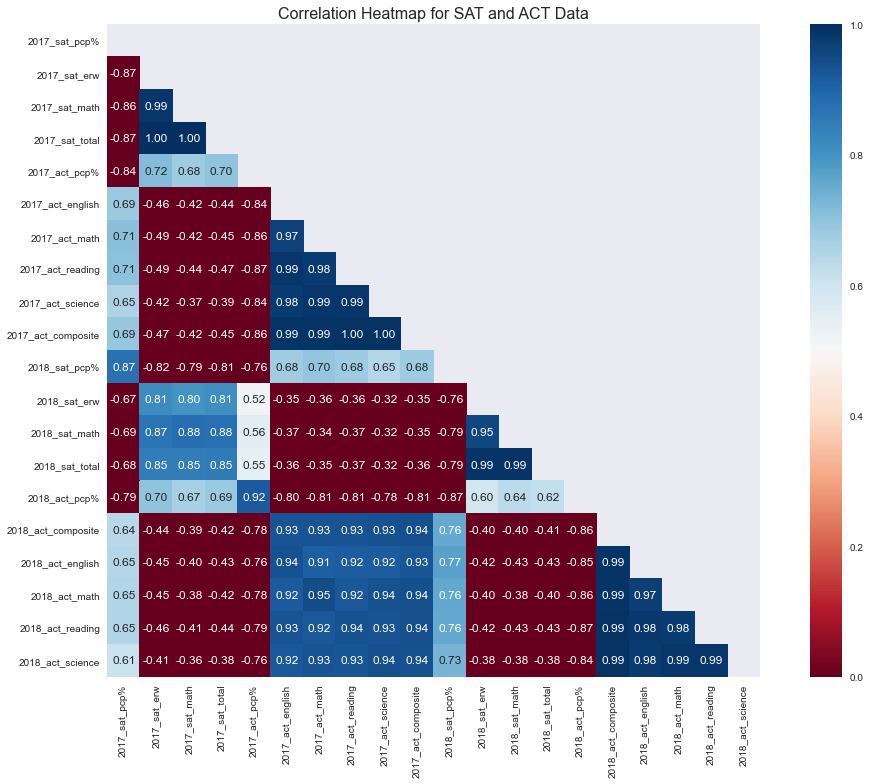

In [427]:
fig, ax = plt.subplots(figsize=(18,12))
final_correlations = final.corr();

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final_correlations)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(final_correlations, mask=mask, vmin = 0, vmax=1, square=True, annot=True, cmap="RdBu",
            fmt=".2f", annot_kws={'fontsize' : 12});
plt.title("Correlation Heatmap for SAT and ACT Data", fontsize=16)
plt.show()

**Observations**

- Mean scores on a given test are highly negatively correlated with participation rate on that test (r ~ -0.8). This directly indicates the earlier observation of higher scores on SAT had lower SAT participation rate and higher ACT participation rate had lower ACT scores).

- Mean scores on sections of a given test are highly correlated (r ~ 0.9 to 1.0) with mean scores for other sections of that test, or total scores for that test.

- Mean scores on sections of the SAT are moderately negatively correlated with mean scores on ACT, and vice versa (r ~ -0.6).

- Participation rate on a given test is moderately positively correlated with scores on the opposite test (r ~ 0.6). Again, this directly indicates the earlier observation of higher scores on SAT had lower SAT participation rate and higher ACT participation rate had lower ACT scores). COntributing to positive correlation between SAT participation and ACT scores.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [428]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],edgecolor='black', bins=10) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=16 )
        ax[i].set_xlabel(list_of_xlabels, fontsize=12)
        ax[i].set_ylabel('Frequency', fontsize=12)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

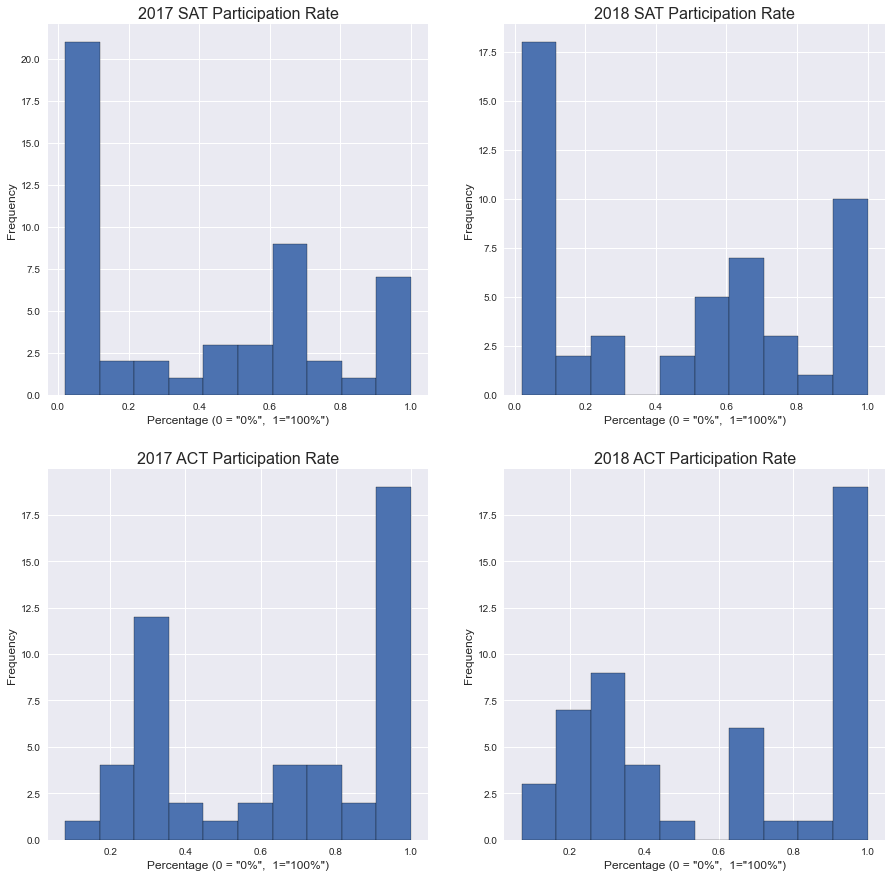

In [429]:
# Participation rates for SAT & ACT
list_of_columns = '2017_sat_pcp%', '2018_sat_pcp%', '2017_act_pcp%', '2018_act_pcp%'
list_of_titles = '2017 SAT Participation Rate', '2018 SAT Participation Rate', '2017 ACT Participation Rate', '2018 ACT Participation Rate'
list_of_xlabels = 'Percentage (0 = "0%",  1="100%")'
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels)

**Observations**
We observed that the distributions for SAT participation rate and ACT participation rate had not changed dramatically from 2017 to 2018. It is also clear that the SAT had a large group of very low participation rates (<10%), a cluster of states with participation in the 50-75% range, and then a group of states with 100% participation.

The ACT had almost no states with lower than 10% participation, had a cluster of states in the 15-40% range, only a small number of states in the mid to high range, and then a large group of states with almost or 100% participation.

In this way the two distributions almost mirror each other and have a bimodal distribution pattern with two peaks.

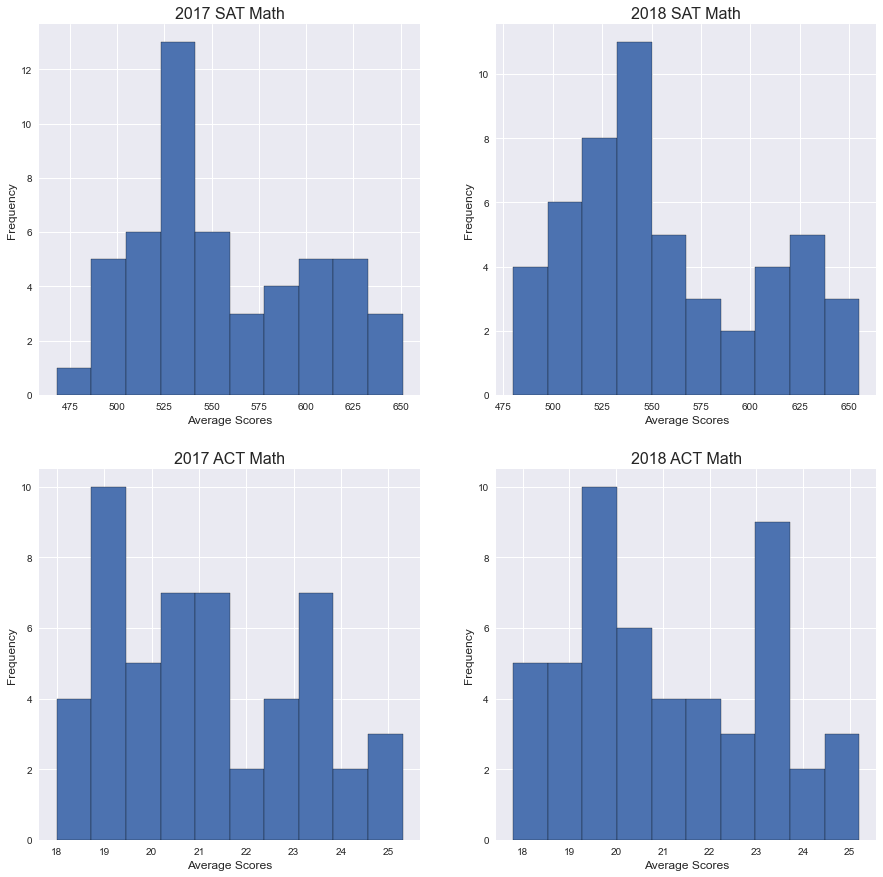

In [430]:
# Math scores for SAT & ACT
list_of_columns = '2017_sat_math', '2018_sat_math', '2017_act_math', '2018_act_math'
list_of_titles = '2017 SAT Math', '2018 SAT Math', '2017 ACT Math', '2018 ACT Math'
list_of_xlabels = 'Average Scores'
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels)

**Observation**
The distributions for SAT Math and ACT Math had not changed dramatically from 2017 to 2018. It is also clear that the SAT had a larger group of low performance than high performance and the situation seems to get worst in 2018.

The ACT had pretty much the same observation of deteriation in performance

Disribution pattern did not change much and following a Bimodal distribution with two peaks.

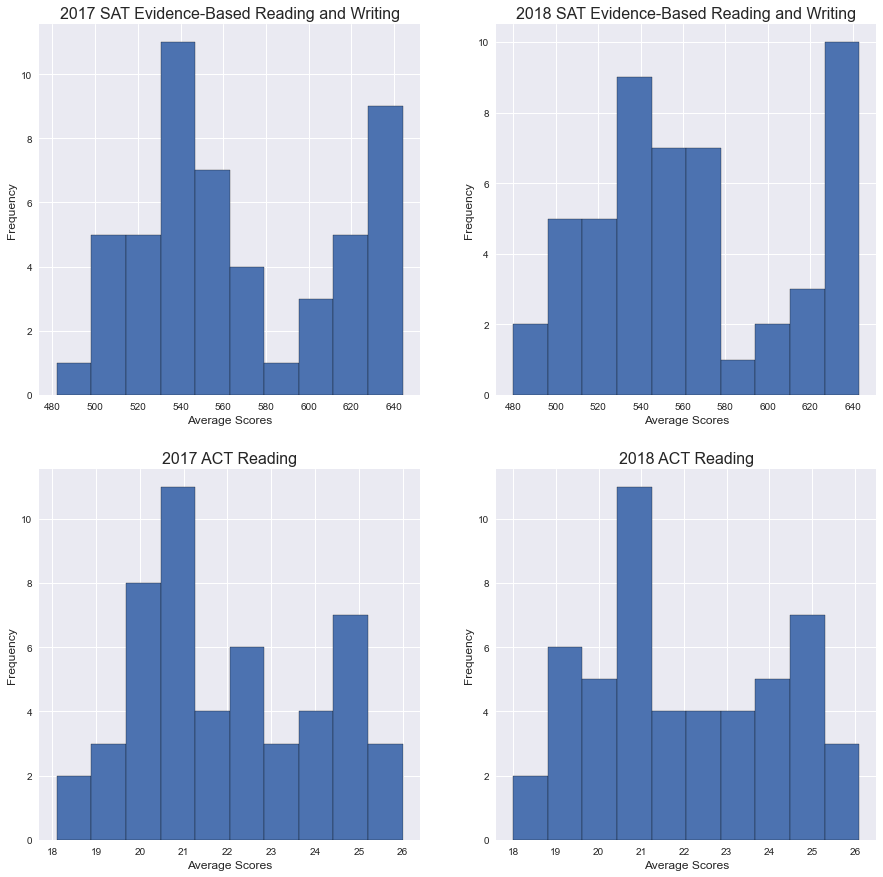

In [431]:
# Reading/verbal scores for SAT & ACT
list_of_columns = '2017_sat_erw', '2018_sat_erw', '2017_act_reading', '2018_act_reading'
list_of_titles = '2017 SAT Evidence-Based Reading and Writing', '2018 SAT Evidence-Based Reading and Writing', '2017 ACT Reading', '2018 ACT Reading'
list_of_xlabels = 'Average Scores'
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels)

**Observation**
The distributions for SAT Evidence-Based Reading and Writing between 2017 and 2018 did not change much. The performance seems to be improving with a shift in lower performance population to higher performance.

The ACT Reading had pretty much the same observation but the shift in lower to higher performance was of a lesser magnitude.

Distribution pattern did not change much and following a Bimodal distribution with two peaks.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [432]:
def subplot_scatter(dataframe, list_of_columns, list_of_titles, list_of_xy_labels):

    plt.style.use('seaborn')
    fig = plt.figure(figsize=(6, 6))
    plt.scatter(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]], marker='^', color='g', alpha=0.7, s=100)
    # Set titles, labels, etc here for each subplot
    plt.title(list_of_titles, fontsize=16)
    plt.xlabel(list_of_xy_labels[0], fontsize=14)
    plt.ylabel(list_of_xy_labels[1], fontsize=14)

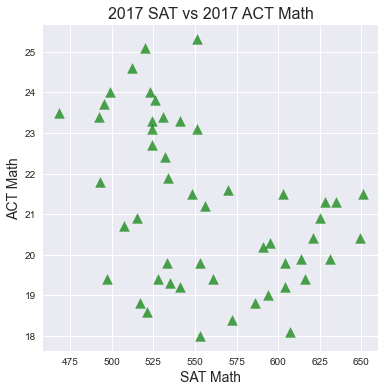

In [433]:
# SAT vs. ACT math scores for 2017

list_of_columns = '2017_sat_math', '2017_act_math'
list_of_xy_labels = 'SAT Math', 'ACT Math'
list_of_titles = '2017 SAT vs 2017 ACT Math'

subplot_scatter(final, list_of_columns, list_of_titles, list_of_xy_labels)

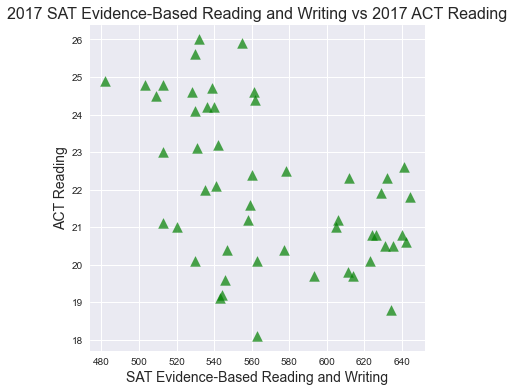

In [434]:
# SAT vs. ACT verbal/reading scores for 201
list_of_columns = '2017_sat_erw', '2017_act_reading'
list_of_xy_labels = 'SAT Evidence-Based Reading and Writing', 'ACT Reading'
list_of_titles = '2017 SAT Evidence-Based Reading and Writing vs 2017 ACT Reading'

subplot_scatter(final, list_of_columns, list_of_titles, list_of_xy_labels)

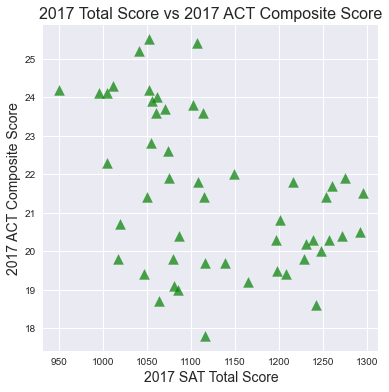

In [435]:
# SAT vs. ACT total/composite scores for 2017
list_of_columns = '2017_sat_total', '2017_act_composite'
list_of_xy_labels = '2017 SAT Total Score', '2017 ACT Composite Score'
list_of_titles = '2017 Total Score vs 2017 ACT Composite Score'

subplot_scatter(final, list_of_columns, list_of_titles, list_of_xy_labels)

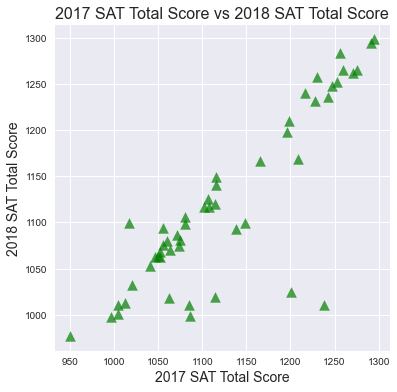

In [436]:
# Total scores for SAT 2017 vs. 2018
list_of_columns = '2017_sat_total', '2018_sat_total'
list_of_xy_labels = '2017 SAT Total Score', '2018 SAT Total Score'
list_of_titles = '2017 SAT Total Score vs 2018 SAT Total Score'

subplot_scatter(final, list_of_columns, list_of_titles, list_of_xy_labels)

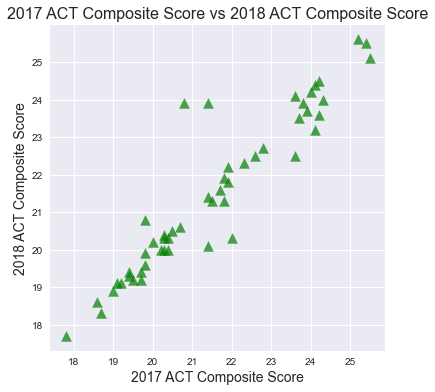

In [437]:
#Composite scores for ACT 2017 vs. 2018
list_of_columns = '2017_act_composite', '2018_act_composite'
list_of_xy_labels = '2017 ACT Composite Score', '2018 ACT Composite Score'
list_of_titles = '2017 ACT Composite Score vs 2018 ACT Composite Score'

subplot_scatter(final, list_of_columns, list_of_titles, list_of_xy_labels)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [438]:
# Note: I am using Seaborn version 0.11.0 so some codes is different from previous versions
sns.__version__

'0.11.0'

In [439]:
# We can create subplots, which allows us to have multiple subplots in the same plot.
# define a boxplot function
def subplot_box(data, title, xlabel="Average Scores"):
    sns.set_style("whitegrid")

    fig, ax = plt.subplots(figsize=(12,8))
    sns.boxplot(data=data, orient='h')
    plt.title(title, fontsize=24)
    plt.xlabel(xlabel, fontsize=18)
    plt.tick_params(labelsize=14)

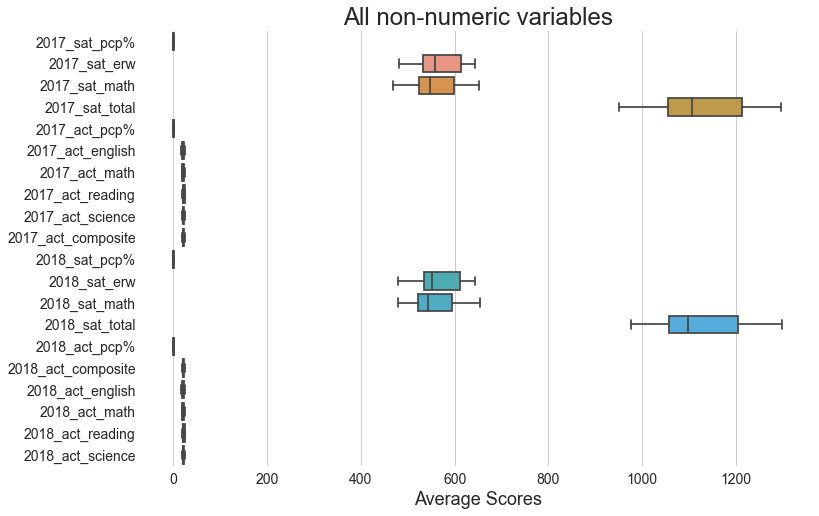

In [440]:
# plotting the entire dataframe we can see that there could be at least 3 or 4 groups with similar min/max values
# note that 'State' is omitted because it is a non-numeric datatype
subplot_box(final, 'All non-numeric variables')

In [441]:
#Transpose final.describe() and sort by max, we identified 4 groups to group into boxplot
final.describe().T.sort_values(by='max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
2018_sat_total,51.0,1120.019608,94.155083,977.00,1057.500,1098.00,1204.000,1298.0
2017_sat_total,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
2018_sat_math,51.0,556.235294,47.772623,480.00,522.500,544.00,593.500,655.0
2017_sat_math,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
2017_sat_erw,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
2018_sat_erw,51.0,563.686275,47.502627,480.00,534.500,552.00,610.500,643.0
2018_act_reading,51.0,22.015686,2.167245,18.00,20.450,21.60,24.100,26.1
2018_act_english,51.0,20.988235,2.446356,16.60,19.100,20.20,23.700,26.0
2017_act_reading,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
2018_act_composite,51.0,21.486275,2.106278,17.70,19.950,21.30,23.550,25.6


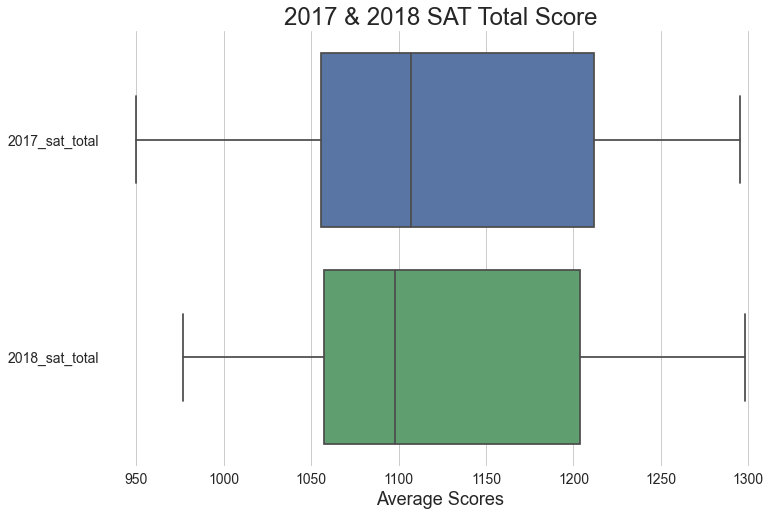

In [442]:
# group1 = the SAT total score group where range > 800 (i.e. SAT max scores is only 800)
box_grp1_df = final[["2017_sat_total", "2018_sat_total"]]
subplot_box(box_grp1_df, '2017 & 2018 SAT Total Score')

**Observation**
Mean drop between the years

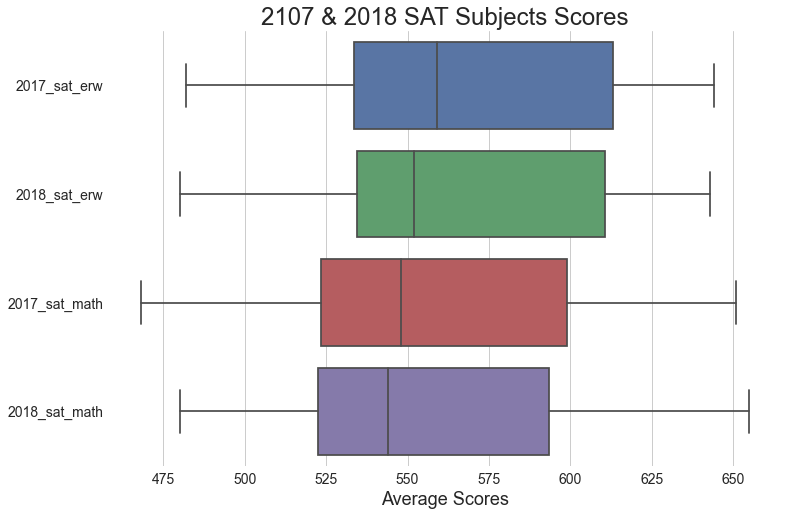

In [443]:
# group2 = the SAT subjects group where range between 200 to 800 inclusive (i.e. SAT subject score range)
box_grp2_df = final[["2017_sat_erw", "2018_sat_erw", "2017_sat_math", "2018_sat_math"]]
subplot_box(box_grp2_df, '2107 & 2018 SAT Subjects Scores')

**Observation**
Mean drop between the years

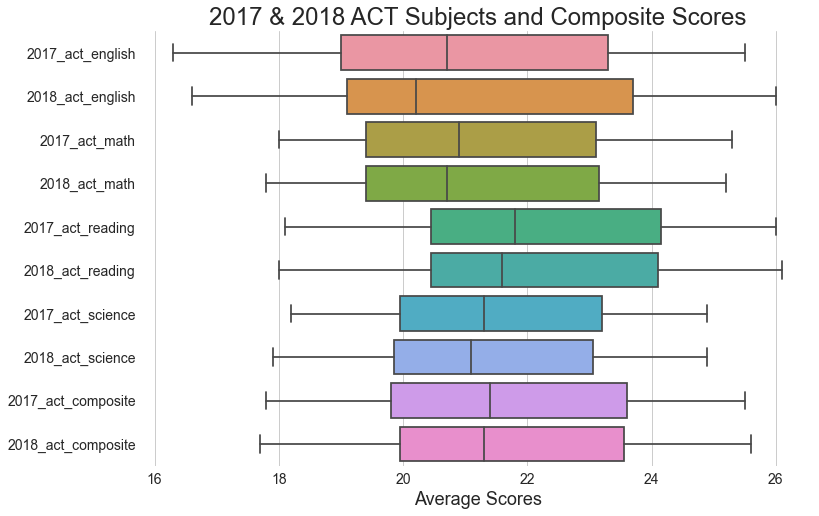

In [444]:
# group3 = the ACT subjects group where range between 1 to 36 inclusive (i.e. ACT subject score range)
box_grp3_df = final[['2017_act_english', '2018_act_english',
                     '2017_act_math', '2018_act_math',
                     '2017_act_reading', '2018_act_reading',
                     '2017_act_science', '2018_act_science',
                     '2017_act_composite', '2018_act_composite']]
subplot_box(box_grp3_df, '2017 & 2018 ACT Subjects and Composite Scores')

**Observation**
Mean drop between the years

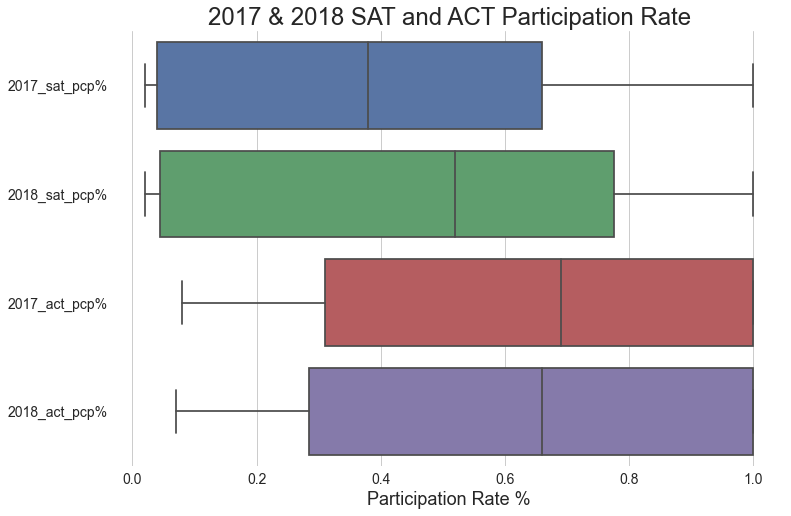

In [445]:
# group4 = the SAT and ACT participate rate group where range is between 0 to 1 inclusive (i.e. percentage)
box_grp4_df = final[['2017_sat_pcp%', '2018_sat_pcp%', '2017_act_pcp%', '2018_act_pcp%']]
subplot_box(box_grp4_df,'2017 & 2018 SAT and ACT Participation Rate', 'Participation Rate %')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Additionally**, I like to look at the relationship between the SAT/ACT Total Score against their respective participation rates.

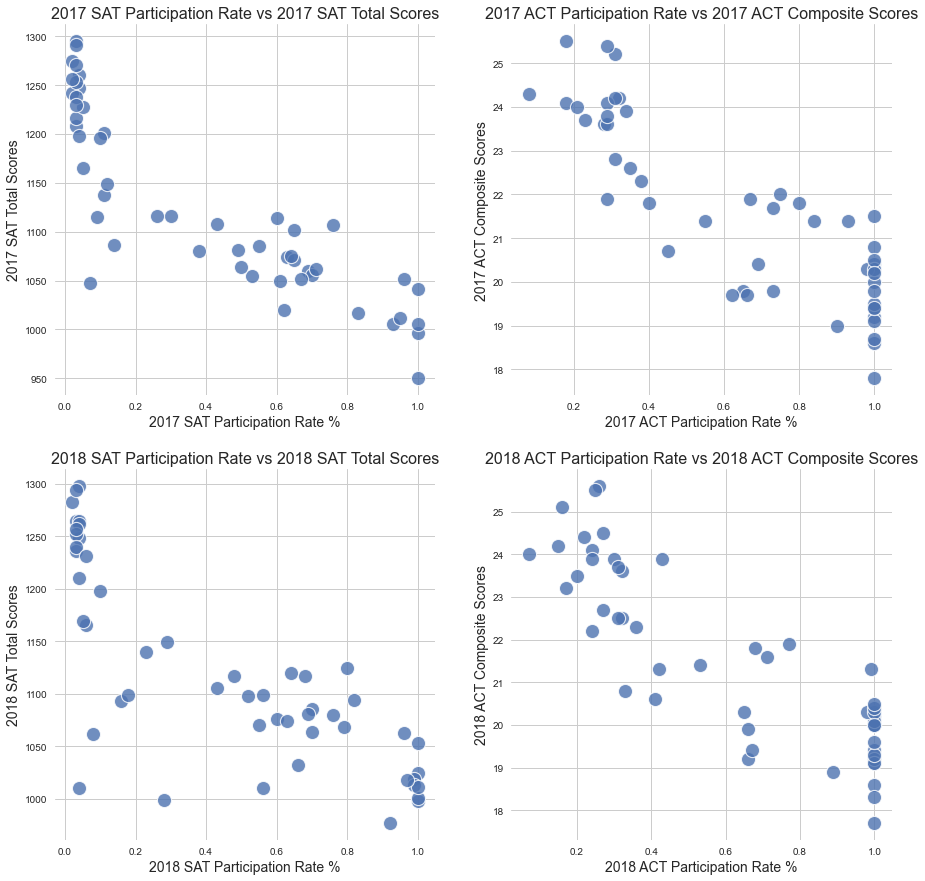

In [446]:
# plotting scatters to visualize
fig, [(ax1, ax2), (ax3, ax4)] = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

sns.scatterplot(x="2017_sat_pcp%", y="2017_sat_total", data=final,
                marker="o", alpha=0.8, s=200, ax=ax1);
ax1.set_xlabel("2017 SAT Participation Rate %", fontsize=14)
ax1.set_ylabel("2017 SAT Total Scores", fontsize=14)
ax1.set_title("2017 SAT Participation Rate vs 2017 SAT Total Scores", fontsize=16)

sns.scatterplot(x="2017_act_pcp%", y="2017_act_composite", data=final,
                marker="o", alpha=0.8, s=200, ax=ax2);
ax2.set_xlabel("2017 ACT Participation Rate %", fontsize=14)
ax2.set_ylabel("2017 ACT Composite Scores", fontsize=14)
ax2.set_title("2017 ACT Participation Rate vs 2017 ACT Composite Scores", fontsize=16)

sns.scatterplot(x="2018_sat_pcp%", y="2018_sat_total", data=final,
                marker="o", alpha=0.8, s=200, ax=ax3);
ax3.set_xlabel("2018 SAT Participation Rate %", fontsize=14)
ax3.set_ylabel("2018 SAT Total Scores", fontsize=14)
ax3.set_title("2018 SAT Participation Rate vs 2018 SAT Total Scores", fontsize=16)

sns.scatterplot(x="2018_act_pcp%", y="2018_act_composite", data=final,
                marker="o", alpha=0.8, s=200, ax=ax4);
ax4.set_xlabel("2018 ACT Participation Rate %", fontsize=14)
ax4.set_ylabel("2018 ACT Composite Scores", fontsize=14)
ax4.set_title("2018 ACT Participation Rate vs 2018 ACT Composite Scores", fontsize=16)

plt.show()

**ACT and SAT scores are inversely correlated with their respective participation rates.** This is likely due to selection bias, as low participation means those who are participating tend to be higher achieving, and high participation means diluted quality of performance.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

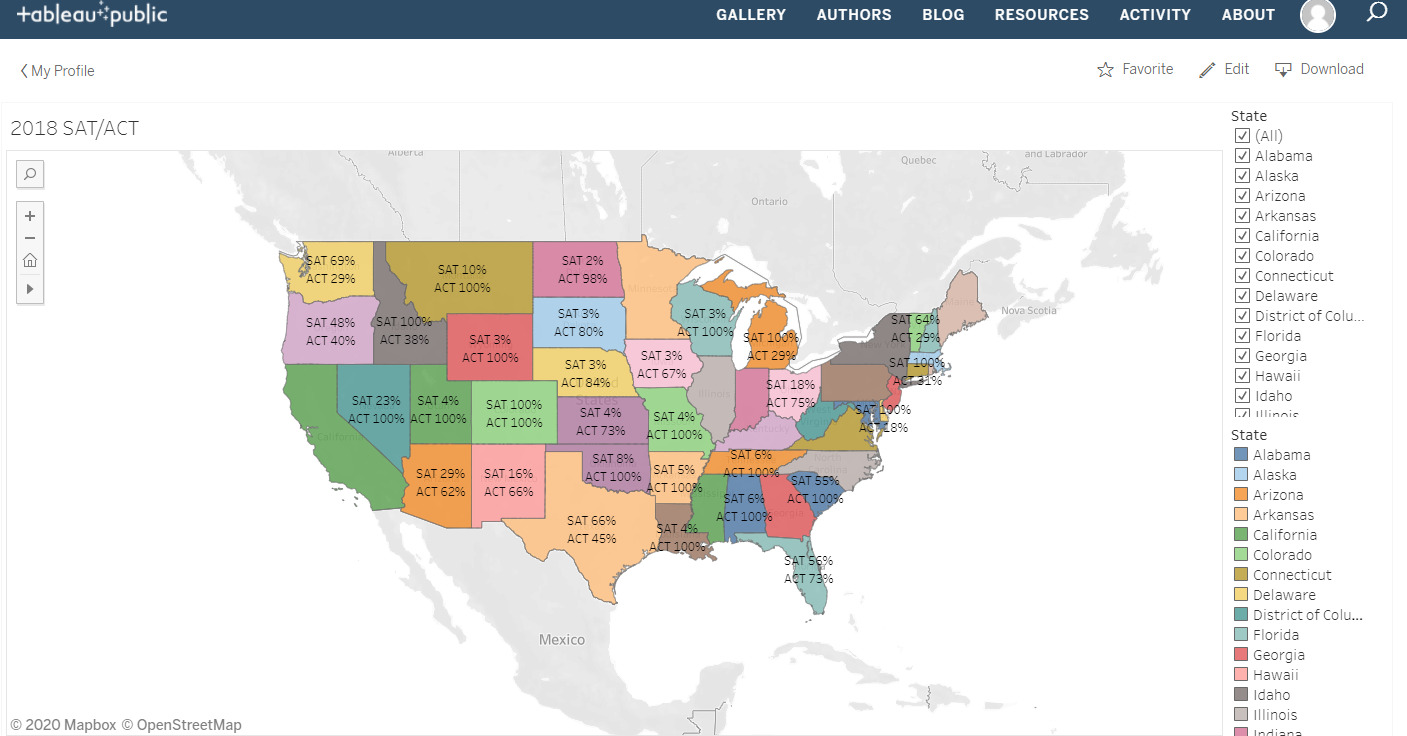

Tableau Public link to this can be access [here](https://public.tableau.com/profile/jeffrey.sim2093#!/vizhome/GA-DSIProject1/2018SATACT?publish=yes). Mouseover each of the states will show the breakdown of the scores.
Note: Only plotted 2018 data instead of every variable.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [447]:
# Question asked for "EACH VARIABLE", with the exception of 'State' which is non-numeric,
# Please expect to see a very long list of plots and summary statistics
print(len(final.columns), final.columns)
# To be exact 20 variables = 20 plots..

21 Index(['state', '2017_sat_pcp%', '2017_sat_erw', '2017_sat_math',
       '2017_sat_total', '2017_act_pcp%', '2017_act_english', '2017_act_math',
       '2017_act_reading', '2017_act_science', '2017_act_composite',
       '2018_sat_pcp%', '2018_sat_erw', '2018_sat_math', '2018_sat_total',
       '2018_act_pcp%', '2018_act_composite', '2018_act_english',
       '2018_act_math', '2018_act_reading', '2018_act_science'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
2017_sat_pcp%,51.0,0.398039,0.352766,0.02,0.04,0.38,0.66,1.0


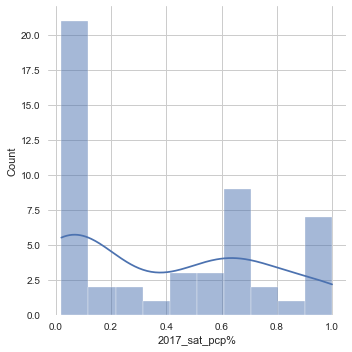

In [448]:
# 2017_sat_pcp%
sns.displot(final['2017_sat_pcp%'],kde=True, bins=10);
final[['2017_sat_pcp%']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2017_sat_total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


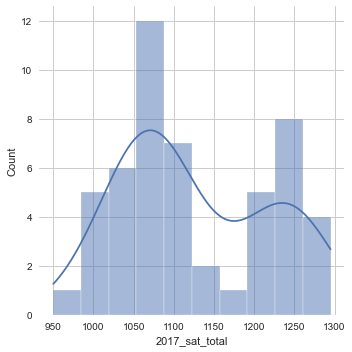

In [449]:
# 2017_sat_total
sns.displot(final['2017_sat_total'],kde=True, bins=10);
final[['2017_sat_total']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2017_sat_erw,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0


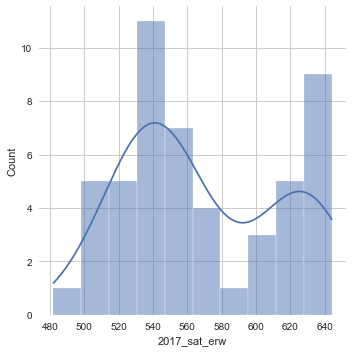

In [450]:
# 2017_sat_erw
sns.displot(final['2017_sat_erw'],kde=True, bins=10);
final[['2017_sat_erw']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2017_sat_math,51.0,556.882353,47.121395,468.0,523.5,548.0,599.0,651.0


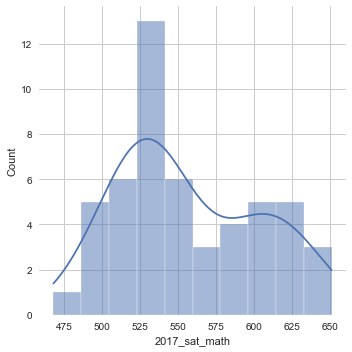

In [451]:
# 2017_sat_math
sns.displot(final['2017_sat_math'],kde=True, bins=10);
final[['2017_sat_math']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2017_act_pcp%,51.0,0.652549,0.321408,0.08,0.31,0.69,1.0,1.0


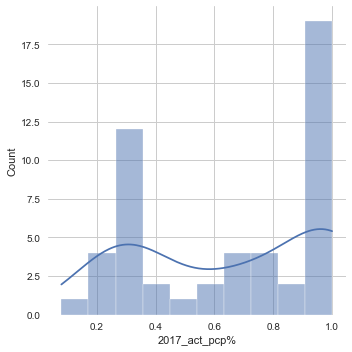

In [452]:
# 2017_act_pcp%
sns.displot(final['2017_act_pcp%'],kde=True, bins=10);
final[['2017_act_pcp%']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2017_act_composite,51.0,21.519608,2.020695,17.8,19.8,21.4,23.6,25.5


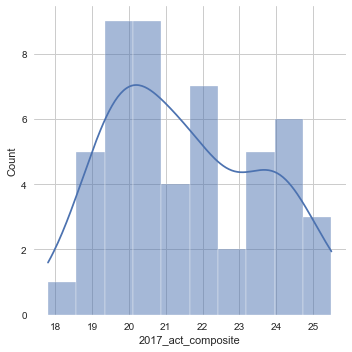

In [453]:
# 2017_act_composite
sns.displot(final['2017_act_composite'],kde=True, bins=10);
final[['2017_act_composite']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2017_act_english,51.0,20.931373,2.353677,16.3,19.0,20.7,23.3,25.5


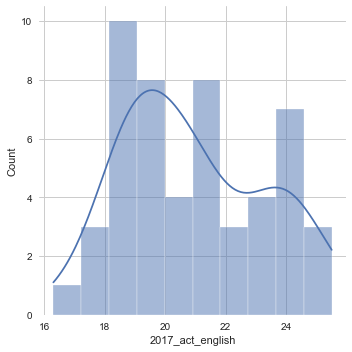

In [454]:
# 2017_act_english
sns.displot(final['2017_act_english'],kde=True, bins=10);
final[['2017_act_english']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2017_act_math,51.0,21.182353,1.981989,18.0,19.4,20.9,23.1,25.3


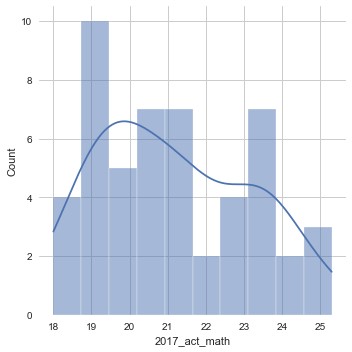

In [455]:
# 2017_act_math
sns.displot(final['2017_act_math'],kde=True, bins=10);
final[['2017_act_math']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2017_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0


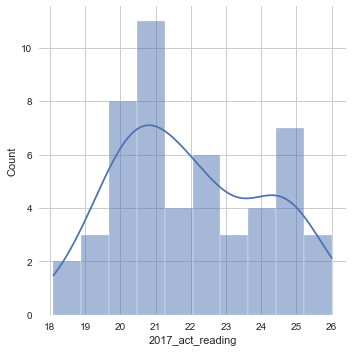

In [456]:
# 2017_act_reading
sns.displot(final['2017_act_reading'],kde=True, bins=10);
final[['2017_act_reading']].describe().T

**Observation**

The summary statistics are as shown and the distributuion appears to a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2017_act_science,51.0,21.45098,1.739353,18.2,19.95,21.3,23.2,24.9


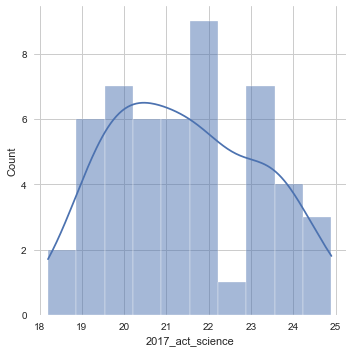

In [457]:
# 2017_act_science
sns.displot(final['2017_act_science'],kde=True, bins=10);
final[['2017_act_science']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2018_sat_pcp%,51.0,0.457451,0.373143,0.02,0.045,0.52,0.775,1.0


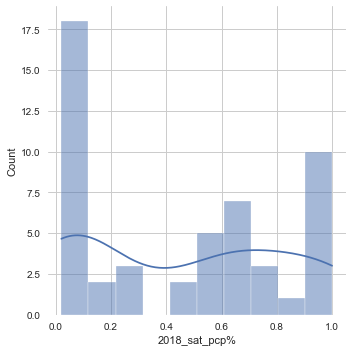

In [458]:
# 2018_sat_pcp%
sns.displot(final['2018_sat_pcp%'],kde=True, bins=10);
final[['2018_sat_pcp%']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2018_sat_erw,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0


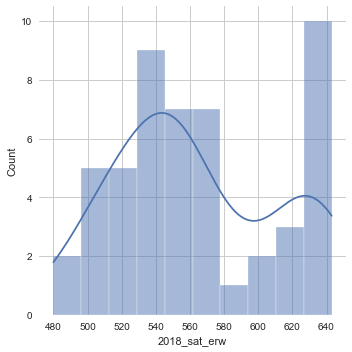

In [459]:
# 2018_sat_erw
sns.displot(final['2018_sat_erw'],kde=True, bins=10);
final[['2018_sat_erw']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2018_sat_math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0


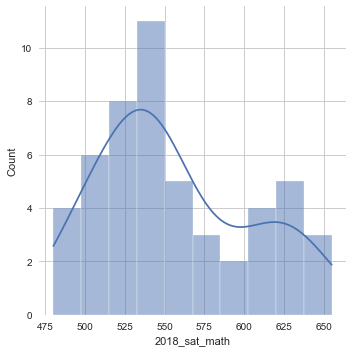

In [460]:
# 2018_sat_math
sns.displot(final['2018_sat_math'],kde=True, bins=10);
final[['2018_sat_math']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2018_sat_total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


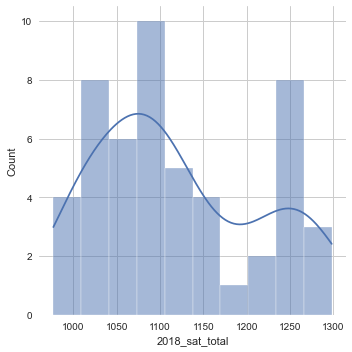

In [461]:
# 2018_sat_total
sns.displot(final['2018_sat_total'],kde=True, bins=10);
final[['2018_sat_total']].describe().T

**Observation**
The summary statistics are as shown and following a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2018_act_pcp%,51.0,0.616471,0.34081,0.07,0.285,0.66,1.0,1.0


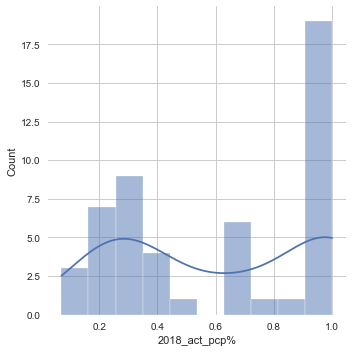

In [462]:
# 2018_act_pcp%
sns.displot(final['2018_act_pcp%'],kde=True, bins=10);
final[['2018_act_pcp%']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2018_act_composite,51.0,21.486275,2.106278,17.7,19.95,21.3,23.55,25.6


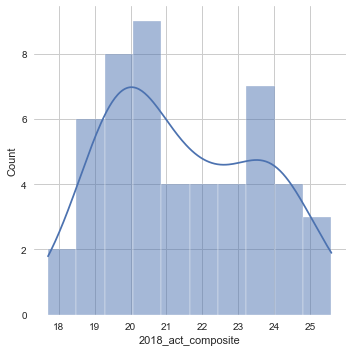

In [463]:
# 2018_act_composite
sns.displot(final['2018_act_composite'],kde=True, bins=10);
final[['2018_act_composite']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2018_act_english,51.0,20.988235,2.446356,16.6,19.1,20.2,23.7,26.0


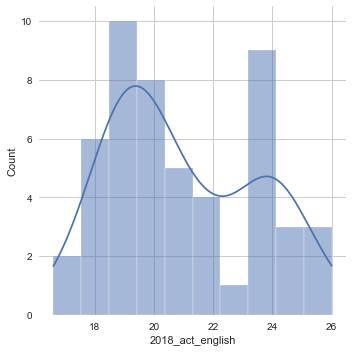

In [464]:
# 2018_act_english
sns.displot(final['2018_act_english'],kde=True, bins=10);
final[['2018_act_english']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.

,count,mean,std,min,25%,50%,75%,max
2018_act_math,51.0,21.12549,2.035765,17.8,19.4,20.7,23.15,25.2


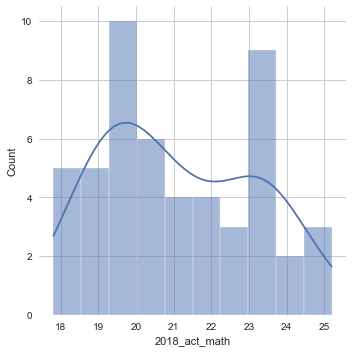

In [465]:
# 2018_act_math
sns.displot(final['2018_act_math'],kde=True, bins=10);
final[['2018_act_math']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2018_act_reading,51.0,22.015686,2.167245,18.0,20.45,21.6,24.1,26.1


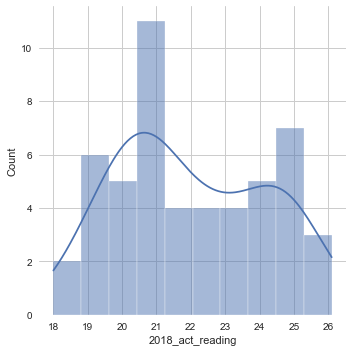

In [466]:
# 2018_act_reading
sns.displot(final['2018_act_reading'],kde=True, bins=10);
final[['2018_act_reading']].describe().T

**Observation**
The summary statistics are as shown and folloiwng a Bimodal distribution with two peaks.

,count,mean,std,min,25%,50%,75%,max
2018_act_science,51.0,21.345098,1.870114,17.9,19.85,21.1,23.05,24.9


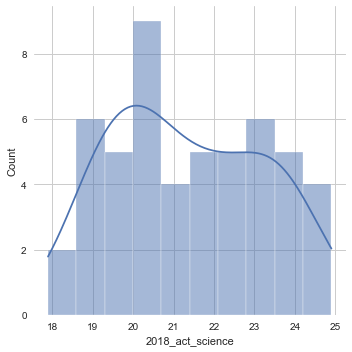

In [467]:
# 2018_act_science
sns.displot(final['2018_act_science'],kde=True, bins=10);
final[['2018_act_science']].describe().T

**Observation**
The summary statistics are as shown and the distributuion appears to be a skewed normal distribution.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

**Answer:**
Yes. This means that if I take a sample of size 𝑛=51 and find the mean of that sample, then do it for all possible samples of size  𝑛 , this distribution of sample means tends to be Normally distributed as long as 𝑛 is big enough.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer:**
A quick plot of 2017 and 2018 ACT Math and ACT Reading data below, they all have a distribution shape that is close to being Normally Distributed although there are skewness observed. According to CLT, if we can get more sample means from these data and plot it again, the sampling distribution of the sample means will approach a Normal Distribution.

Estimates made from these data are likely to be Normally Distributed as well.

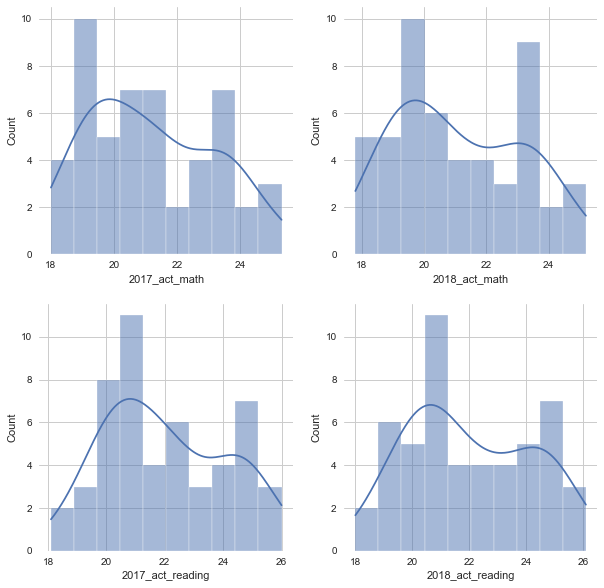

In [468]:
# visual plots for above question
fig, axes = plt.subplots(2,2, figsize=(10,10))
sns.histplot(data=final['2017_act_math'],kde=True, bins=10, ax=axes[0,0])
sns.histplot(data=final['2018_act_math'],kde=True, bins=10, ax=axes[0,1])
sns.histplot(data=final['2017_act_reading'],kde=True, bins=10, ax=axes[1,0])
sns.histplot(data=final['2018_act_reading'],kde=True, bins=10, ax=axes[1,1]);

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:**

Participation rate has a huge impact on state average SAT/ACT scores.

**(a)  Participation rate**

Participation rate had a huge impact on state average SAT/ACT scores.

_Relationships between populations sizes & rates:_

- Low participation states have lesser people taking the tests. However, these people are usually the ones who need to pass the tests and put in more effort to get better scores. This results in bias and artificially higher scores.

- High participation state have more people taking the tests. However, these include the good performers and the bad performers. This also results in bias and artificially lower scores.

_Granularity and aggregation:_

- How the participation rates are being aggregated also makes a difference. If it is simply aggregating the average participation rates of each school in each state, it will not be accurate because it is an average of an average. However, if the aggregation method is to take the total number of test takers against the total number of qualified/eligible test takers in the state in the year. It will have better accuracy.

Considering the above, we will still attempt to conduct inference with these data because until statistically tested with relative confidence level, it will be too early to reject any hypothesis on these data. In the code file, there is an example of conducting statistical inference on SAT/ACT Math to demonstrate this point.

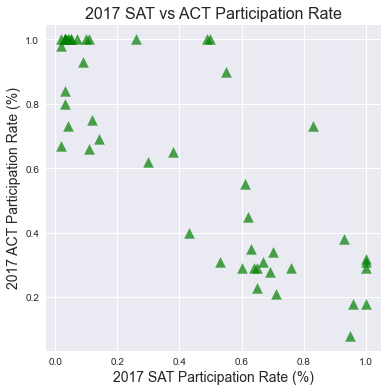

In [469]:
subplot_scatter(final, ['2017_sat_pcp%', '2017_act_pcp%'],
                        '2017 SAT vs ACT Participation Rate',
                        ['2017 SAT Participation Rate (%)', '2017 ACT Participation Rate (%)'])

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answer**
Yes, as shown above. There is a correlation between participation rate and average scores so it is also appropriate to infer that one who perform better in SAT Math could be better than another in ACT Math, statistically speaking of course. Until statistically proven otherwise.

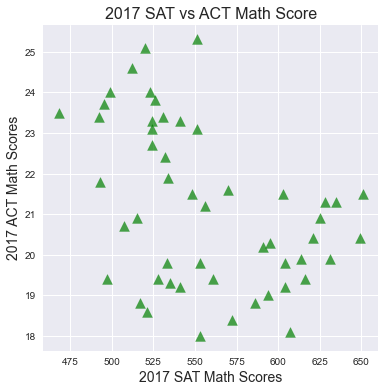

In [470]:
subplot_scatter(final, ['2017_sat_math', '2017_act_math'],
                        '2017 SAT vs ACT Math Score',
                        ['2017 SAT Math Scores', '2017 ACT Math Scores'])

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

**Answer**

**Step 1**
- Null hypothesis =  higher SAT math score is **NOT** better than those with lower ACT math score (status quo)
- Alternate hypothesis = higher SAT math score **IS** better than those with lower ACT math score (what I am proving)

**Step 2**
- Establish a level of significance which in this case let's consider 95% confidence interval, alpha = +/- 1.96.

**Step 3**
- Calculate the statistics

In [471]:
# create a dataframe with only the required variables using only 2018 math as examples
hypo_df=final[["state", "2018_sat_math", "2018_act_math"]]

In [472]:
import statsmodels.api as sm

In [473]:
# The outcome variable is also called the response or dependent variable (X),
# and the risk factors and confounders are called the predictors, or explanatory or independent variables (Y).

Y = hypo_df["2018_sat_math"]
X = hypo_df["2018_act_math"]
X = sm.add_constant(X, prepend=True)
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          2018_sat_math   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     8.513
Date:                Sun, 08 Nov 2020   Prob (F-statistic):            0.00531
Time:                        22:17:36   Log-Likelihood:                -264.97
No. Observations:                  51   AIC:                             533.9
Df Residuals:                      49   BIC:                             537.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           746.9615     65.667     11.375      0.000     615.000     878.923
2018_act_math    -9.0283      3.094     -2.918      0.005     -15.247      -2.810
==============================================================================
Omnibus:                        2.688   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.548
Skew:                           0.487   Prob(JB):                        0.280
Kurtosis:                       2.501   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Step 4**

- Find p-values and make a conclusion:

    - Check p-value of F-statistic = 0.00531 (model level)
    Null hypothesis will be true is this is zero i.e. all coeficient is zero
    Alternative Hypothesis is true if this is < 0.01, then at least one variable is likely to predict Y

    - Check p-value of t-statistic = 0.005 (variable level)
    Null hypothesis will be true is this is zero i.e no impact
    Alternative hypothesis is true if this is <0.05, then the feature islikely to predict Y
    If this is >0.05, the 95% confidence interval will pass through 0

- Conclusion, since p-value < 0.05 the Null hypothesis is invalid and the Alternative hypothesis of "higher SAT math score **IS** better than those with lower ACT math score is valid."

**"I am 95% confident that the true population of "2018_act_math" is between -15.247 and -2.810"**

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [474]:
# filter out the interested variables
sat_pcp = final[["state", "2017_sat_pcp%", "2018_sat_pcp%", "2017_act_pcp%", "2018_act_pcp%"]]
sat_pcp.head()

,state,2017_sat_pcp%,2018_sat_pcp%,2017_act_pcp%,2018_act_pcp%
0,Alabama,0.05,0.06,1.00,1.00
1,Alaska,0.38,0.43,0.65,0.33
2,Arizona,0.30,0.29,0.62,0.66
3,Arkansas,0.03,0.05,1.00,1.00
4,California,0.53,0.60,0.31,0.27


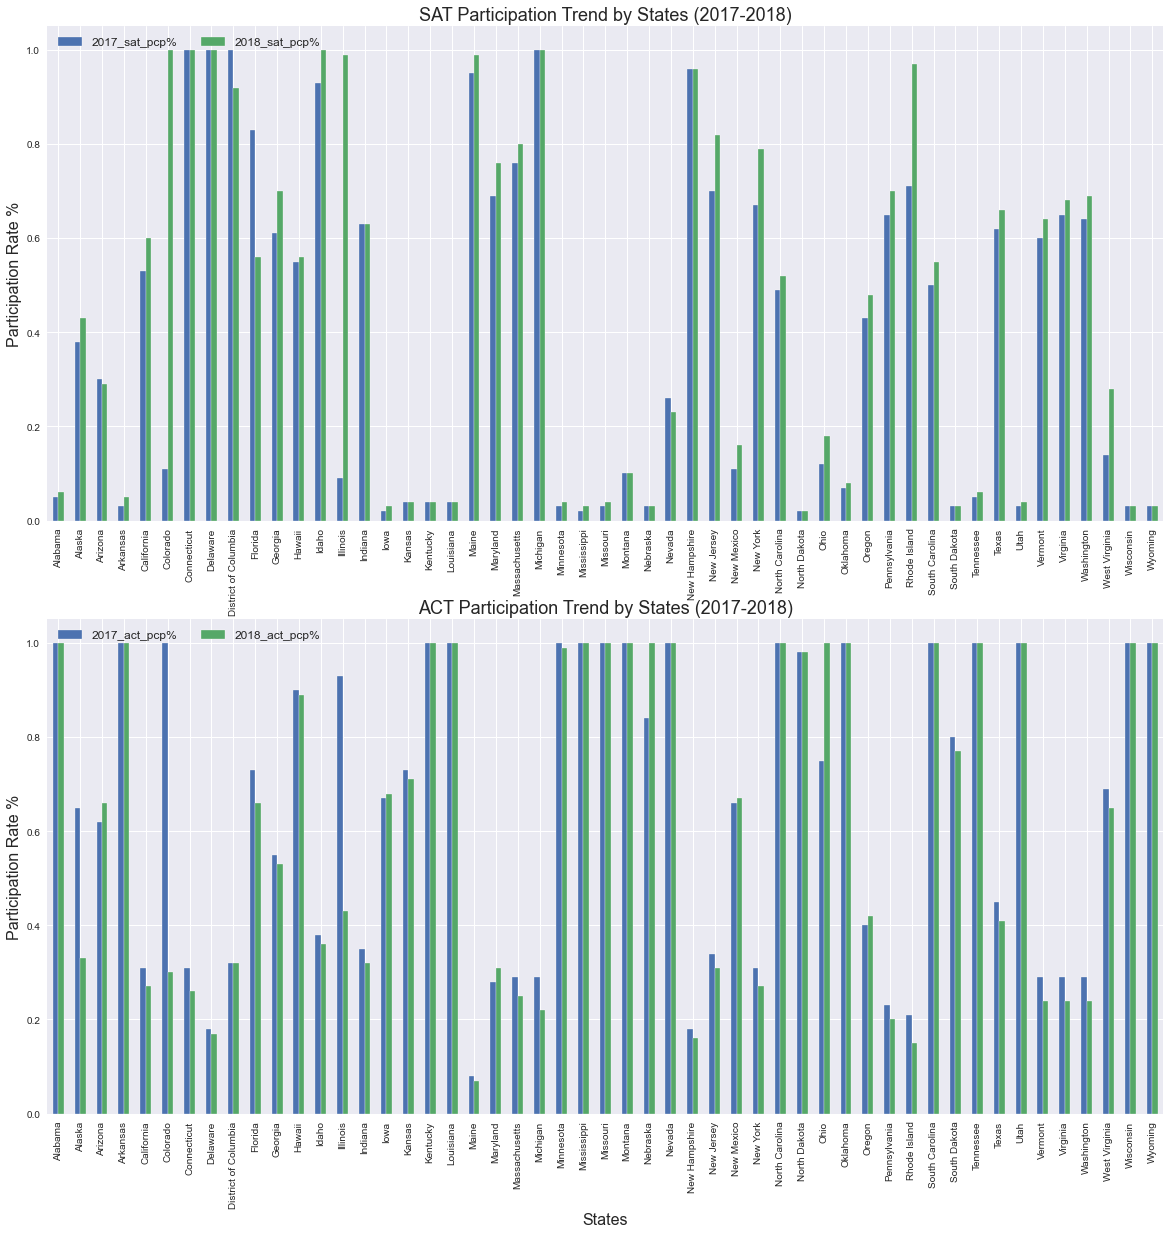

In [475]:
# plot bar graphs to spot interesting trends

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,20)) # You'll want to specify your figsize

sat_pcp.plot(x='state',y=['2017_sat_pcp%','2018_sat_pcp%'], kind='bar', ax=ax1)
ax1.set_ylabel('Participation Rate %', fontsize=16)
ax1.set_xlabel('States', fontsize=16)
ax1.set_title('SAT Participation Trend by States (2017-2018)', fontsize=18)
ax1.legend(loc=2, ncol =2, fontsize=12)

sat_pcp.plot(x='state',y=['2017_act_pcp%','2018_act_pcp%'], kind='bar', ax=ax2)
ax2.set_ylabel('Participation Rate %', fontsize=16)
ax2.set_xlabel('States', fontsize=16)
ax2.set_title('ACT Participation Trend by States (2017-2018)', fontsize=18)
ax2.legend(loc=2, ncol=2, fontsize=12)
plt.show()


**Answer**

Interesting trend observed:
1. From the charts, Colorado and Illinois had significant increase in 2018 SAT participation rate as compared to 2017 while at the same time had significant reduction in their ACT participation rate.

2. From the ACT chart, Alaska, Colorado and Illinois had significant reduction in 2018 ACT participation rate as compared to 2017.

Therefore, **Alaska, Colorado and Illinois** are chosen as the three states to be investigated further.

**Investigating Colorado and Illinois had significant increase in 2018 SAT participation rate as compared to 2017**

According to various articles found online, both states implemented mandatory SAT testing as well as the allowing contracts with the ACT to expire.

Articles sources:
- According to this article (source:https://www.testive.com/state-sat-act/), Colorado and Illinois were still listed as states that require the ACT in the year 2017-2018.

- According to this article (source:https://blog.prepscholar.com/which-states-require-the-sat), three key points mentioned for the states of interest:
    1. As of the 2016-17 school year, all Colorado juniors in public schools will take the SAT
    2. Beginning with the 2016-17 school year, all Illinois juniors must take the SAT.
    3. Schools or districts can administer the SAT to their students (either as an option or a requirement). These states include Alaska...
    
- According to this article (source: https://reports.collegeboard.org/archive/sat-suite-program-results/2018/sat-school-day), in 2017-18, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) and the District of Columbia covered the cost of the SAT for all their public school students.

- Illinois - (source: https://www.chicagotribune.com/news/breaking/ct-parcc-test-high-school-met-20160711-story.html). Quote - "Illinois is ditching the controversial state PARCC exam for high school students, instead giving 11th-graders a state-paid SAT college entrance exam next spring. The announcement from the Illinois State Board of Education on Monday comes after only two administrations of PARCC, in the spring of 2015 and 2016, following dismal test scores and thousands of students skipping the exams. For many years in the past, the state gave a free and popular ACT college entrance exam to roughly 140,000 high school juniors. ACT's contract expired, and there was no state-paid college entrance exam for students in spring 2016, although some districts paid for it on their own. ISBE chose this past school year to switch to the SAT, which O'Mara said is expected to be to given in April 2017."

Since the participation rate increase is significant, there may be an impact to these states' SAT and ACT scores. To investigate the correlation of this impact, lets look at the scatterplots below.

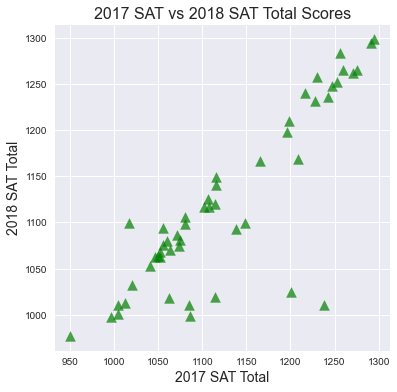

In [476]:
# making a scatterplot to visualize SAT participation rate
list_of_columns = '2017_sat_total', '2018_sat_total'
list_of_xy_labels = '2017 SAT Total', '2018 SAT Total'
list_of_titles = '2017 SAT vs 2018 SAT Total Scores'

subplot_scatter(final, list_of_columns, list_of_titles, list_of_xy_labels)

In [477]:
# displaying filtered columns for reference
target_states = final[final["state"].isin(["Colorado", "Illinois", "Alaska"])] \
[["state", "2017_sat_pcp%", "2017_sat_total", "2018_sat_pcp%", "2018_sat_total"]]
target_states

,state,2017_sat_pcp%,2017_sat_total,2018_sat_pcp%,2018_sat_total
1,Alaska,0.38,1080,0.43,1106
5,Colorado,0.11,1201,1.00,1025
13,Illinois,0.09,1115,0.99,1019


From the scatter plot, we see that there is a high correlation between SAT Total score in 2017 and 2018 for each state. There are a few exceptions where we see that states have dropped off from 2017 to 2018.

If we look at Colorado, the SAT total score fell from 1201 to 1025. This is likely attributable in part to a large increase in SAT participation (11% in 2017 to 28% in 2018), which might dilute the quality of the average score. However, this fails to explain the scale of the drop entirely, given that Illinois only saw a drop from 1115 to 1019 with a much larger increase in participation (9% participation in 2017, 99% in 2018).

This was also mentioned in my answer to the statistical inference question in the earlier sections where I advocate inference may still be possible but require further investigations to establish the confidence in the inference.

**Investigating Alaska, Colorado and Illinois had significant reduction in 2018 ACT participation rate as compared to 2017**

Articles sources:
- According to this article (source:https://www.testive.com/state-sat-act/), **none** of Alaska, Colorado and Illinois are listed as states that require the ACT.
- According to this article (source:https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/#:~:text=The%20SAT%20and%20ACT%20cost,district%20fee%20for%20the%20diplomas), Alaska's high school students no longer need to take the SAT, ACT or WorkKeys test to get their diplomas. The state law requiring the college or career readiness tests expired Thursday. As of now, the Class of 2017 will only need to meet credit requirements to get their diplomas, said Margaret MacKinnon, director of assessment and accountability at Alaska's state education department.
- According to this article (source:https://www.usnews.com/education/best-colleges/articles/2018-01-23/how-to-take-the-sat-act-for-free#:~:text=Test%2Dtakers%20must%20pay%20%2449.50,other%20changes%20in%20test%20administration), Test-takers must pay USD49.50 to register for the SAT or USD52 for the ACT, according to the College Board and ACT websites. For test versions that include writing portions, the SAT costs USD64.50 and the ACT runs USD68. Other fees may apply to both exams for late registration or other changes in test administration. There are also states that will pay the bill for the SAT and ACT for public school students. (Note: I extracted the paying states from this link as well)

From these articles, we knew that some states made it compulsory to take SAT or ACT while some did not. We also knew that some states paid for the tests and these tests were not cheap, even most costly if test takers chose to take the writing portions.

It is then interesting to determine the correlation (if any) between participation rate and whether the states pay for it or not. The codes below attempt to do this.

In [478]:
# creating a list of states paying the test fees, derived from the articles above.
sat_paying_states = ["Colorado", "Connecticut", "Delaware" , "District of Columbia", "Idaho", "Illinois",
                     "Maine", "Michigan", "New Hampshire", "Rhode", "Island", "West Virginia"]
act_paying_states = ["Alabama", "Arkansas","Hawaii","Kansas","Kentucky","Louisiana","Minnesota",
                     "Mississippi","Montana","Nebraska","Nevada","North Carolina","North Dakota","Ohio",
                     "Oklahoma","South Carolina","Tennessee","Utah","Wisconsin","Wyoming"]
paying_states = sat_paying_states + act_paying_states
# make a new dataframe
paying_states_df = pd.DataFrame(paying_states)
paying_states_df.rename(columns={0:'state'}, inplace=True)
paying_states_df["paying_states"] = "paying"
paying_states_df.shape

(32, 2)

In [479]:
# check shape before merge
print("before merge", final.shape)
# merge and check shape after merge
final = pd.merge(final, paying_states_df, on='state', how='left')
print("after merge", final.shape)

before merge (51, 21)
after merge (51, 22)


In [480]:
# inspecting the new column [paying_states] reveals several NaN
final["paying_states"].isnull().tail()

46     True
47     True
48    False
49    False
50    False
Name: paying_states, dtype: bool

In [481]:
# let change the NaN values to the intended wtring of 'non-paying'
final["paying_states"].fillna(value='non-paying', inplace=True)

In [482]:
# re-check to confirm no more NaN values and confirm shape is correct
print(final.shape)
final["paying_states"].isnull().tail()

(51, 22)


46    False
47    False
48    False
49    False
50    False
Name: paying_states, dtype: bool

In [483]:
# let create a paying_states dataframe with require columns
paying_states_df = final[["state", "2017_sat_pcp%","2018_sat_pcp%","2017_act_pcp%","2018_act_pcp%","paying_states"]]
paying_states_df.shape

(51, 6)

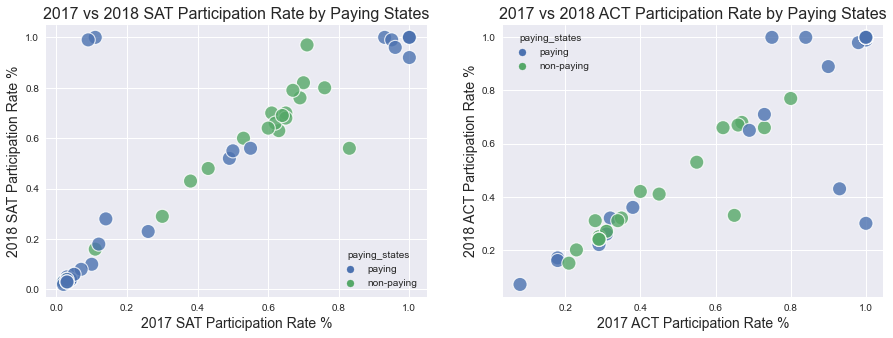

In [484]:
# plotting scatters to visualize
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.scatterplot(x="2017_sat_pcp%", y="2018_sat_pcp%", hue="paying_states", data=paying_states_df,
                marker="o", alpha=0.8, s=200, ax=ax1);
ax1.set_ylabel("2018 SAT Participation Rate %", fontsize=14)
ax1.set_xlabel("2017 SAT Participation Rate %", fontsize=14)
ax1.set_title("2017 vs 2018 SAT Participation Rate by Paying States", fontsize=16)

sns.scatterplot(x="2017_act_pcp%", y="2018_act_pcp%", hue="paying_states", data=paying_states_df,
                marker="o", alpha=0.8, s=200, ax=ax2);
ax2.set_ylabel("2018 ACT Participation Rate %", fontsize=14)
ax2.set_xlabel("2017 ACT Participation Rate %", fontsize=14)
ax2.set_title("2017 vs 2018 ACT Participation Rate by Paying States", fontsize=16)

plt.show()


In [485]:
# Grouping and subsetting to see a clearer picture
paying_states_group = paying_states_df.groupby("paying_states")
paying_states_group.groups

{'non-paying': [1, 2, 4, 9, 10, 14, 15, 20, 21, 25, 30, 31, 32, 37, 38, 39, 41, 43, 45, 46, 47], 'paying': [0, 3, 5, 6, 7, 8, 11, 12, 13, 16, 17, 18, 19, 22, 23, 24, 26, 27, 28, 29, 33, 34, 35, 36, 40, 42, 44, 48, 49, 50]}

In [486]:
# filtering and displaying the three targeted states for investigation
paying_states_df[paying_states_df["state"].isin(["Colorado", "Illinois", "Alaska"])]

,state,2017_sat_pcp%,2018_sat_pcp%,2017_act_pcp%,2018_act_pcp%,paying_states
1,Alaska,0.38,0.43,0.65,0.33,non-paying
5,Colorado,0.11,1.00,1.00,0.30,paying
13,Illinois,0.09,0.99,0.93,0.43,paying


From the above SAT scatter plots, it can be observed that almost all states who had above 80% participation rate, had their test fees paid by the states. Colorado and Illinois both saw significant increase in SAT participation rate when the states started paying the SAT fees in 2017-2018. Also since both states still require either the SAT and ACT, it is not surprising to see ACT participation rate dropping as more test takers switch to the free SAT test.

If we draw a diagonal across, there were alot of states lying between 50-80%  participation rate but test fees were not paid by the states. Given the high positive correlation of the 2017 and 2018 Participation rate, it is very possible that if the non-paying states in the 50-80% participation rate, starts to pay for the test fees as well. We could see further participation rate increase.

As for ACT scatter plot, the same can be observed but there is a greater number of non-paying states in the 20-80% participation rate region. If these non-paying states starts to pay for the test fees, the ACT participation rate is likely to increase. Interestingly, none of Alaska, Colorado and Illinois were listed as states that require the ACT. This further supports the drop in ACT participation rate. Moreover, Alaska do not pay for either SAT or ACT test fees.


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

**Answer**

**Conclusion**

The ACT and SAT participation distributions roughly mirror each other, with states tending to prefer one test or the other based on bias of **whether SAT or ACT is required** in that state and **whether the state is paying for the tests or not**.

**ACT and SAT scores are inversely correlated with their respective participation rates.** This is likely due to selection bias, as low participation means those who are participating tend to be higher achieving, and high participation means diluted quality of performance.


**Recommendation**

It is recommended that the College Board takes into consideration, **household income data especially for states with low participation rate and is currently a non-paying state.** The analysis had shown a correlation in this aspect that makes it worth further investigation.

The analysis had yielded a list of states with **low participation rate and is currently a non-paying state**, of which the College Board could work with to share and implement support and fiscal policies that were put in place in states with high participation rate. In particular, our analysis specifically identified **Alaska** as a potential working target.